<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.



#### Project Title: Indian Start-up Funding Analysis(2018-2021): A Guide for Entreprenuers Interested in Venturing into The Indian Start-up Ecosystem

#### Project Description: This analysis is to give insight to entreprenuers who are seeking to venture into the Indian start-up ecosystem by highlighting key metrics to consider before venturing

#### Hypothesis: 1. 
####
####                       2.
####
#### Assumptions:
1. In the 2018 Amount if the amount does not begin with any currency symbol it will be considered as in dollars.
2. If the Year the company was founded and the year it was funded are the same, replace null values in the stage column with 'Seed' stage
3. Duplcates rows with with differnce in column values is treated as multiple funsings.

#### Questions

1. How many companies were funded each year?
2. Which sectors had most startups each year?
3. What was the highest average funding yearly? 
4. Did Companies receive multiple funding through out the time period? What are the percentages?
5. Which cities had most startups?
6. Which Investors funded more startups?
7. Is there any correlation between the features?: 
6. What was the dominant startups in the top cities
9. What is the correlation between Company Age at the time of funding and Amount?
8. What is the relationship between the Amount and the top 4 Funding Stage?
10. What is the relationship between the top 3 Cities with more startups, the funding stage and the amount


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data manipulation and cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# load the datasets with pandas
df_2018 = pd.read_csv('startup_funding2018.csv')
df_2019 = pd.read_csv('startup_funding2019.csv')
df_2020 = pd.read_csv('startup_funding2020.csv')
df_2021 = pd.read_csv('startup_funding2021.csv')

print('Dataset loaded')

Dataset loaded


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

#### 2018 startup_funding dataset previewing

In [4]:
# Check the datatypes
df_2018.info()

# display  dataframe
df_2018.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


Company Name                                           Industry  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

  Round/Series       Amount                          Location  \
0         Seed       250000       Bangalore, Karnataka, India   
1         Seed  ₹40,000,000        Mumbai, Maharashtra, India   
2     Series A  ₹65,000,000           Gurgaon, Haryana, India   
3        Angel      2000000       Noida, Uttar Pradesh, India   
4         Seed            —  Hyderabad, Andhra Pradesh, India   

                                       About Company  
0  TheCollegeFever is a hub for fun, fiesta and f...  
1  A startup which aggregates milk from dairy far...  
2          Leading Online Loans Marketplace in India  
3  PayMe India is an innovative FinTech organizat...  
4  Eunimart is a one stop solution for merchants ...

#### 2019 startup_funding dataset previewing

In [5]:
# check the data types
df_2019.info()

# Display the dataframe
df_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor     Amount($)  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

In [6]:
# check null values 
df_2020[df_2020['Amount($)'].isna()]

Company/Brand Founded HeadQuarter              Sector  \
29          Delhivery    2011     Gurgaon          E-commerce   
44   PointOne Capital    2020   Bangalore  Venture capitalist   
235             Tring    2019      Mumbai        Social Media   

                                          What it does  \
29   Delhivery is a supply chain services company t...   
44                  Pre-seed/Seed focussed VC investor   
235  Tring is a celebrity engagement platform, for ...   

                                              Founders  \
29   Kapil Bharati, Mohit Tandon, Sahil Barua, Sura...   
44                                           Mihir Jha   
235        Akshay Saini, Rahul Saini, Pranav Chabhadia   

                                              Investor Amount($) Stage  \
29   Steadview Capital, Canada Pension Plan Investm...       NaN   NaN   
44                                                 NaN       NaN   NaN   
235                         Sujeet Kumar, Hemesh Singh       NaN   NaN   

    Unnamed: 9  
29         NaN  
44         NaN  
235        NaN

#### 2020 startup_funding dataset previewing

In [7]:
# check datatypes
df_2020.info()
# get the head of the data
df_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


Company/Brand Founded HeadQuarter              Sector  \
0    Aqgromalin    2019     Chennai            AgriTech   
1      Krayonnz    2019   Bangalore              EdTech   
2  PadCare Labs    2018        Pune  Hygiene management   
3         NCOME    2020   New Delhi              Escrow   
4    Gramophone    2016      Indore            AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor    Amount($)     Stage Unnamed: 9  
0                      Angel investors     $200,000       NaN        NaN  
1                      GSF Accelerator     $100,000  Pre-seed        NaN  
2                       Venture Center  Undisclosed  Pre-seed        NaN  
3  Venture Catalysts, PointOne Capital     $400,000       NaN        NaN  
4  Siana Capital Management, Info Edge     $340,000       NaN        NaN

### 2021 startup_funding dataset previewing

In [8]:
# check teh datatypes
df_2021.info()

# display data
df_2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor     Amount($)         Stage  
0                    BEENEXT, Entrepreneur First    $1,200,000  Pre-series A  
1       Unilazer Ventures, IIFL Asset Management  $120,000,000           NaN  
2               GSV Ventures, Westbridge Capital   $30,000,000      Series D  
3                         CDC Group, IDG Capital   $51,000,000      Series C  
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal    $2,000,000          Seed

Observations made from the data

2018 Observations
- The columns in 2018 are different from 2019-2021 dataset
- The amount column has a mixture of Indian rupees and US dollar symbol
- The industry and location columns have multiple information

2019 Observations
- The founded column has  float data type
- The amount column has object data type. It has a dollar sign and commas

2020 Observations
- The amount column has object data type. It has a dollar sign and commas
- There's a column 'Unnamed: 9'

2021 Observations
- The amount column has object data type. It has a dollar sign and commas.
- The founded column has  float data type

# Cleaning Datasets

 #### Cleaning 2018

In [9]:
# Display dataframe 
df_2018.head(10)

Company Name                                           Industry  \
0     TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1     Happy Cow Dairy                               Agriculture, Farming   
2          MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3         PayMe India                        Financial Services, FinTech   
4            Eunimart                 E-Commerce Platforms, Retail, SaaS   
5              Hasura                   Cloud Infrastructure, PaaS, SaaS   
6           Tripshelf                     Internet, Leisure, Marketplace   
7        Hyperdata.IO                                    Market Research   
8        Freightwalla       Information Services, Information Technology   
9  Microchip Payments                                    Mobile Payments   

  Round/Series       Amount                          Location  \
0         Seed       250000       Bangalore, Karnataka, India   
1         Seed  ₹40,000,000        Mumbai, Maharashtra, India   
2     Series A  ₹65,000,000           Gurgaon, Haryana, India   
3        Angel      2000000       Noida, Uttar Pradesh, India   
4         Seed            —  Hyderabad, Andhra Pradesh, India   
5         Seed      1600000       Bengaluru, Karnataka, India   
6         Seed  ₹16,000,000             Kalkaji, Delhi, India   
7        Angel  ₹50,000,000  Hyderabad, Andhra Pradesh, India   
8         Seed            —        Mumbai, Maharashtra, India   
9         Seed            —       Bangalore, Karnataka, India   

                                       About Company  
0  TheCollegeFever is a hub for fun, fiesta and f...  
1  A startup which aggregates milk from dairy far...  
2          Leading Online Loans Marketplace in India  
3  PayMe India is an innovative FinTech organizat...  
4  Eunimart is a one stop solution for merchants ...  
5  Hasura is a platform that allows developers to...  
6  Tripshelf is an online market place for holida...  
7  Hyperdata combines advanced machine learning w...  
8  Freightwalla is an international forwarder tha...  
9  Microchip payments is a mobile-based payment a...

In [10]:
# check for duplicates in rows
df_2018.duplicated().sum()

1

In [11]:
# drop duplicates
df_2018.drop_duplicates(inplace=True)

In [12]:
# comfirm duplicates have been dropped
print(df_2018.duplicated().sum())

0


In [13]:
# split location and Industry into list and get first item
df_2018['Industry'] = df_2018['Industry'].str.split(',').str[0]
df_2018['Location'] = df_2018['Location'].str.split(',').str[0]

In [14]:
# confirm splitting of columns: Location and Industry
df_2018[['Industry', 'Location']].head(10)

Industry   Location
0       Brand Marketing  Bangalore
1           Agriculture     Mumbai
2                Credit    Gurgaon
3    Financial Services      Noida
4  E-Commerce Platforms  Hyderabad
5  Cloud Infrastructure  Bengaluru
6              Internet    Kalkaji
7       Market Research  Hyderabad
8  Information Services     Mumbai
9       Mobile Payments  Bangalore

In [15]:
# Let' clean the Amount column
# replace commas and extract numbers to create a new column
df_2018['Amount($)'] = df_2018['Amount'].str.replace(',', '').str.extract(r'(\d+)').astype(float)      

In [16]:
# Let's assume the amount with no amount sign is already in dollars 
# loop through both Amount and Amount$ and convert Rupees into Dollars
for i in range(len(df_2018['Amount'])):
    df_2018.reset_index(drop=True, inplace=True)
    if df_2018.loc[i, 'Amount'][0] == '₹':
        df_2018.loc[i, 'Amount($)'] = df_2018.loc[i, 'Amount($)'] * 0.0146

In [17]:
# create a copy of the 2018 datframe
df_2018_copy = df_2018.copy()
df_2018_copy.head()

Company Name              Industry Round/Series       Amount   Location  \
0  TheCollegeFever       Brand Marketing         Seed       250000  Bangalore   
1  Happy Cow Dairy           Agriculture         Seed  ₹40,000,000     Mumbai   
2       MyLoanCare                Credit     Series A  ₹65,000,000    Gurgaon   
3      PayMe India    Financial Services        Angel      2000000      Noida   
4         Eunimart  E-Commerce Platforms         Seed            —  Hyderabad   

                                       About Company  Amount($)  
0  TheCollegeFever is a hub for fun, fiesta and f...   250000.0  
1  A startup which aggregates milk from dairy far...   584000.0  
2          Leading Online Loans Marketplace in India   949000.0  
3  PayMe India is an innovative FinTech organizat...  2000000.0  
4  Eunimart is a one stop solution for merchants ...        NaN

In [18]:
# drop Amount column
df_2018_copy.drop(columns=['Amount'], inplace=True)
# Create Year of Funding column
df_2018_copy['Year of Funding'] = '2018'
#Create Funding Status column
df_2018_copy['Funding Status'] = 'Disclosed'

In [19]:
# Check the shape of the dataframe
print(df_2018_copy.shape)
df_2018_copy.head()

(525, 8)


Company Name              Industry Round/Series   Location  \
0  TheCollegeFever       Brand Marketing         Seed  Bangalore   
1  Happy Cow Dairy           Agriculture         Seed     Mumbai   
2       MyLoanCare                Credit     Series A    Gurgaon   
3      PayMe India    Financial Services        Angel      Noida   
4         Eunimart  E-Commerce Platforms         Seed  Hyderabad   

                                       About Company  Amount($)  \
0  TheCollegeFever is a hub for fun, fiesta and f...   250000.0   
1  A startup which aggregates milk from dairy far...   584000.0   
2          Leading Online Loans Marketplace in India   949000.0   
3  PayMe India is an innovative FinTech organizat...  2000000.0   
4  Eunimart is a one stop solution for merchants ...        NaN   

  Year of Funding Funding Status  
0            2018      Disclosed  
1            2018      Disclosed  
2            2018      Disclosed  
3            2018      Disclosed  
4            2018      Disclosed

In [20]:
# check the null values in each column of the dateframe
df_2018_copy.isnull().sum()

Company Name         0
Industry             0
Round/Series         0
Location             0
About Company        0
Amount($)          148
Year of Funding      0
Funding Status       0
dtype: int64

In [21]:
# # fill null values with the mode in the Amount($) column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_18 = imputer.fit(df_2018_copy[['Amount($)']])
df_2018_copy['Amount($)'] = imputer_18.transform(df_2018_copy[['Amount($)']])
df_2018_copy['Amount($)'].head()

0     250000.0
1     584000.0
2     949000.0
3    2000000.0
4    1000000.0
Name: Amount($), dtype: float64

In [22]:
# comfirm null value have been replaced
df_2018_copy['Amount($)'].isnull().sum()

0

In [23]:
# check for duplicates in the Company Name
df_2018_copy.duplicated(['Company Name']).sum()

0

In [24]:
### Suppress scietific notations in budget_adj and revenue_adj
pd.options.display.float_format = '{:.1f}'.format
df_2018_copy.head(10)

Company Name              Industry Round/Series   Location  \
0     TheCollegeFever       Brand Marketing         Seed  Bangalore   
1     Happy Cow Dairy           Agriculture         Seed     Mumbai   
2          MyLoanCare                Credit     Series A    Gurgaon   
3         PayMe India    Financial Services        Angel      Noida   
4            Eunimart  E-Commerce Platforms         Seed  Hyderabad   
5              Hasura  Cloud Infrastructure         Seed  Bengaluru   
6           Tripshelf              Internet         Seed    Kalkaji   
7        Hyperdata.IO       Market Research        Angel  Hyderabad   
8        Freightwalla  Information Services         Seed     Mumbai   
9  Microchip Payments       Mobile Payments         Seed  Bangalore   

                                       About Company  Amount($)  \
0  TheCollegeFever is a hub for fun, fiesta and f...   250000.0   
1  A startup which aggregates milk from dairy far...   584000.0   
2          Leading Online Loans Marketplace in India   949000.0   
3  PayMe India is an innovative FinTech organizat...  2000000.0   
4  Eunimart is a one stop solution for merchants ...  1000000.0   
5  Hasura is a platform that allows developers to...  1600000.0   
6  Tripshelf is an online market place for holida...   233600.0   
7  Hyperdata combines advanced machine learning w...   730000.0   
8  Freightwalla is an international forwarder tha...  1000000.0   
9  Microchip payments is a mobile-based payment a...  1000000.0   

  Year of Funding Funding Status  
0            2018      Disclosed  
1            2018      Disclosed  
2            2018      Disclosed  
3            2018      Disclosed  
4            2018      Disclosed  
5            2018      Disclosed  
6            2018      Disclosed  
7            2018      Disclosed  
8            2018      Disclosed  
9            2018      Disclosed

#### Cleaning 2019


In [25]:
# display dataframe
df_2019.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor     Amount($)  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

In [26]:
# Check for duplicated rows
df_2019.duplicated().sum()

0

In [27]:
# check for duplicates iin the Company/Brand column
df_2019.duplicated('Company/Brand').sum()

2

In [28]:
# display duplicate name in Company/Brand column
brand_duplicates_2019 = df_2019[df_2019.duplicated('Company/Brand')]['Company/Brand'].tolist()
brand_duplicates_2019

['Licious', 'Kratikal']

In [29]:
# display rows with duplicated company names
dup_19 = df_2019[df_2019['Company/Brand'].isin(brand_duplicates_2019)].sort_values(by='Company/Brand')
dup_19

Company/Brand  Founded    HeadQuarter      Sector  \
7       Kratikal   2013.0          Noida  Technology   
82      Kratikal      NaN  Uttar pradesh  Technology   
30       Licious      NaN      Bangalore        Food   
68       Licious   2015.0      Bangalore        Food   

                                         What it does  \
7   It is a product-based cybersecurity solutions ...   
82                  Provides cyber security solutions   
30                                   Online meat shop   
68                                   Online meat shop   

                                           Founders  \
7   Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa   
82                                   Pavan Kushwaha   
30                       Vivek Gupta, Abhay Hanjura   
68                       Vivek Gupta, Abhay Hanjura   

                                      Investor    Amount($)         Stage  
7   Gilda VC, Art Venture, Rajeev Chitrabhanu.   $1,000,000  Pre series A  
82   Gilda VC, Art Venture, Rajeev Chitrabhanu   $1,000,000  Pre-series A  
30                          Vertex Growth Fund  $30,000,000      Series E  
68                             Vertex Ventures  $25,000,000      Series D

In [30]:
# replace year with 2015
df_2019.loc[30, 'Founded']=2015
df_2019.loc[82, 'Founded']=2013

In [31]:
# comfirm dropped duplicates in Company/Nmae
df_2019.duplicated('Company/Brand').sum()

2

In [32]:
# filter dataframe with 'undisclosed' in the Amount$ column 
undisclosed = df_2019[df_2019['Amount($)'].str.match('U.+')]
undisclosed

Company/Brand  Founded HeadQuarter            Sector  \
5                       FlytBase      NaN        Pune        Technology   
6                          Finly      NaN   Bangalore              SaaS   
10                    Cub McPaws   2010.0      Mumbai   E-commerce & AR   
14                   Open Secret      NaN         NaN         Food tech   
19  Azah Personal Care Pvt. Ltd.   2018.0    Gurugram            Health   
23            DROR Labs Pvt. Ltd   2018.0       Delhi       Safety tech   
32                      Pumpkart   2014.0  Chandigarh     E-marketplace   
45                        Afinoz      NaN       Noida           Fintech   
54                     Ninjacart   2015.0         NaN  B2B Supply Chain   
55                   Binca Games   2014.0      Mumbai             Games   
65                  Cubical Labs   2013.0         NaN               IoT   
75                      Sportido   2015.0       Noida            Sports   

                                         What it does  \
5                         A drone automation platform   
6   It builds software products that makes work si...   
10  A B2C  brand that focusses on premium and comf...   
14           It produces and sells top quality snacks   
19  Aims to solve some problems in the feminine hy...   
23  It uses technology to create a trust-based net...   
32   B2B model for appliances and electrical products   
45  Online financial marketplace for customized ra...   
54  It connects producers of food directly to reta...   
55  It offers games that are available across Indi...   
65                  Home automation solution provider   
75  It is a sports discovery app that helps to fin...   

                                            Founders  \
5                                        Nitin Gupta   
6                          Vivek AG, Veekshith C Rai   
10                           Abhay Bhat, Kinnar Shah   
14                       Ahana Gautam, Udit Kejriwal   
19                          Mohammed, Shashwat Diesh   
23                    Dhiraj Naubhar, Dheeraj Bansal   
32                                         KS Bhatia   
45                                     Rachna Suneja   
54  Thirukumaran Nagarajanin, Vasudevan Chinnathambi   
55                     Rubianca Wadhwa, Sahil Wadhwa   
65                           Dhruv Ratra, Swati Vyas   
75              Neeraj Aggarwala, Akhil Ramachandran   

                                             Investor    Amount($)  \
5                                         Undisclosed  Undisclosed   
6   Social Capital, AngelList India, Gemba Capital...  Undisclosed   
10                                  Venture Catalysts  Undisclosed   
14                                    Matrix Partners  Undisclosed   
19                          Kunal Bahl, Rohit Bansal.  Undisclosed   
23                          Inflection Point Ventures  Undisclosed   
32                                         Dinesh Dua  Undisclosed   
45                             Fintech innovation lab  Undisclosed   
54                                  Walmart, Flipkart  Undisclosed   
55                                     Sunil Gavaskar  Undisclosed   
65                                   Rockstud Capital  Undisclosed   
75  Inflection Point Ventures, SucSEED Venture Par...  Undisclosed   

           Stage  
5            NaN  
6            NaN  
10           NaN  
14           NaN  
19  Pre series A  
23           NaN  
32           NaN  
45           NaN  
54           NaN  
55           NaN  
65      Series B  
75      Series B

In [33]:
# check the founding years for the companies
df_2019['Founded'].value_counts()

2015.0    13
2014.0     8
2016.0     7
2013.0     7
2018.0     6
2017.0     5
2010.0     4
2019.0     4
2011.0     3
2012.0     3
2008.0     1
2004.0     1
Name: Founded, dtype: int64

In [34]:
# Changing the data type of Founded column to a string
def clean_create_cols(data, fund_year):
    data['Amount($)'] = data["Amount($)"].replace({r"(\$$)": np.nan}, regex=True)
    # create a funding status column
    data['Funding Status'] = data["Amount($)"].replace({r"(^[$\d].+)": "Disclosed"}, regex=True)
    # Replace all undisclosed in the Amount column with np.nan and change its datatype to a float
    data["Amount($)"] = data["Amount($)"].replace({r"(\$U.+|\$u.+|U.+)": np.nan, "nan": np.nan}, regex=True)
    data["Amount($)"] = data["Amount($)"].replace({r"(\D)": ""}, regex=True).astype(float)
    # Adding a column to represent the year of funding
    data["Year of Funding"] = fund_year

In [35]:
# run fucntion to clean dataframe
clean_create_cols(df_2019, '2019')

In [36]:
# check the head of the data frame
df_2019.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor   Amount($)  \
0                               Sixth Sense Ventures   6300000.0   
1                                   General Atlantic 150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey  28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...  30000000.0   
4           Innovation in Food and Agriculture (IFA)   6000000.0   

           Stage Funding Status Year of Funding  
0            NaN      Disclosed            2019  
1       Series C      Disclosed            2019  
2  Fresh funding      Disclosed            2019  
3       Series D      Disclosed            2019  
4            NaN      Disclosed            2019

In [37]:
# create a copy of the 2019 datframe
df_2019_copy = df_2019.copy()
df_2019_copy.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor   Amount($)  \
0                               Sixth Sense Ventures   6300000.0   
1                                   General Atlantic 150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey  28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...  30000000.0   
4           Innovation in Food and Agriculture (IFA)   6000000.0   

           Stage Funding Status Year of Funding  
0            NaN      Disclosed            2019  
1       Series C      Disclosed            2019  
2  Fresh funding      Disclosed            2019  
3       Series D      Disclosed            2019  
4            NaN      Disclosed            2019

In [38]:
# confirm the unique values in the funding status column
df_2019_copy['Funding Status'].unique()

array(['Disclosed', 'Undisclosed'], dtype=object)

In [39]:
# check and confirm changed datatypes
df_2019_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    89 non-null     object 
 1   Founded          62 non-null     float64
 2   HeadQuarter      70 non-null     object 
 3   Sector           84 non-null     object 
 4   What it does     89 non-null     object 
 5   Founders         86 non-null     object 
 6   Investor         89 non-null     object 
 7   Amount($)        77 non-null     float64
 8   Stage            43 non-null     object 
 9   Funding Status   89 non-null     object 
 10  Year of Funding  89 non-null     object 
dtypes: float64(2), object(9)
memory usage: 7.8+ KB


In [40]:
# check duplicated Company names
df_2019_copy.duplicated('Company/Brand').sum()

2

In [41]:
# Filter out company which founded in 2019(same year it received funding)
founded_2019 = df_2019_copy[df_2019_copy['Founded']== 2019]
founded_2019



Company/Brand  Founded HeadQuarter           Sector  \
13     JobSquare   2019.0   Ahmedabad          HR tech   
25       Seekify   2019.0       Delhi             SaaS   
29         Bijak   2019.0         NaN         AgriTech   
78      IndyFint   2019.0   Bangalore  Virtual Banking   

                                         What it does  \
13  Technology-based platform that is connecting s...   
25       Customer Experience (CX) Automation platform   
29         B2B platform for agricultural commodities.   
78  It helps lenders to directly provide short-ter...   

                                             Founders  \
13                                       Ishit Jethwa   
25                       Arihant Jain, Ajeet Kushwaha   
29  Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwa...   
78                                  Paddy Padmanabhan   

                                             Investor  Amount($)  \
13                                      Titan Capital   140500.0   
25                                     Sequoia Capita  1500000.0   
29  Omnivore and Omidyar Network India, Sequoia Ca...  2500000.0   
78                                Saravanan Adiseshan  2100000.0   

           Stage Funding Status Year of Funding  
13           NaN      Disclosed            2019  
25  Seed funding      Disclosed            2019  
29     Seed fund      Disclosed            2019  
78      Series A      Disclosed            2019

In [42]:
# get index with empty stage
stage_null_2019 = founded_2019[founded_2019['Stage'].isnull()].index.tolist()
stage_null_2019

[13]

In [43]:
# fill stage null value with seed
df_2019_copy.at[stage_null_2019, 'Stage'] = 'Seed'

In [44]:
# confirm change of null values 
df_2019_copy[df_2019_copy['Stage'].isnull()]

Company/Brand  Founded HeadQuarter               Sector  \
0                 Bombay Shaving      NaN         NaN            Ecommerce   
4                       Nu Genes   2004.0   Telangana             AgriTech   
5                       FlytBase      NaN        Pune           Technology   
6                          Finly      NaN   Bangalore                 SaaS   
10                    Cub McPaws   2010.0      Mumbai      E-commerce & AR   
11                      Appnomic      NaN   Bangalore                 SaaS   
14                   Open Secret      NaN         NaN            Food tech   
15                        LivFin   2017.0       Delhi              Fintech   
16                        Byju's   2011.0         NaN               Edtech   
18                       Witblox   2014.0         NaN               Edtech   
20                    SalaryFits   2015.0         NaN              Fintech   
23            DROR Labs Pvt. Ltd   2018.0       Delhi          Safety tech   
24                       Medlife   2014.0   Bangalore       Pharmaceutical   
27                 Fireflies .ai      NaN         NaN                   AI   
31                         truMe      NaN         NaN                  IoT   
32                      Pumpkart   2014.0  Chandigarh        E-marketplace   
33             Asteria Aerospace   2011.0   Bangalore        Robotics & AI   
39  Lil’ Goodness and sCool meal      NaN   Bangalore     Food & Nutrition   
41                         VMate      NaN         NaN                  NaN   
42          Bombay Shirt Company   2012.0      Mumbai           E-commerce   
43                       Slintel   2016.0         NaN                 SaaS   
44                    MyGameMate      NaN   Bangalore             E-Sports   
45                        Afinoz      NaN       Noida              Fintech   
48                          Box8   2011.0      Mumbai             Foodtech   
54                     Ninjacart   2015.0         NaN     B2B Supply Chain   
55                   Binca Games   2014.0      Mumbai                Games   
58                         Origo   2010.0    Gurugram             AgriTech   
59                     WishADish      NaN       Delhi          Food & tech   
60                  Ecom Express   2012.0    Gurugram            Logistics   
61                 Stanza Living   2017.0       Delhi         Accomodation   
62                        PiBeam      NaN     Chennai      Automotive tech   
63                  Euler Motors      NaN       Delhi      Automotive tech   
66                      Lawyered   2015.0       Delhi           Legal tech   
67                       Cuemath   2013.0   Bangalore               Edtech   
69                    Nivesh.com   2016.0       Noida         Mutual Funds   
71               Smart Institute      NaN       Surat               Edtech   
74                         Credr   2014.0      Mumbai           Automobile   
76                        Phable   2018.0         NaN           Healthtech   
77                         Sarva      NaN     Chennai      Yoga & wellness   
79                     Zolostays   2015.0         NaN         Accomodation   
80                           Ola   2010.0   Bangalore       Transportation   
81                       Zoomcar   2013.0   Bangalore  Transport & Rentals   
85                           Oyo   2013.0    Gurugram          Hospitality   
87                        Spinny   2015.0       Delhi           Automobile   
88               Ess Kay Fincorp      NaN   Rajasthan              Banking   

                                         What it does  \
0          Provides a range of male grooming products   
4   It is a seed company engaged in production, pr...   
5                         A drone automation platform   
6   It builds software products that makes work si...   
10  A B2C  brand that focusses on premium and comf...   
11  It is a self-healing enterprise, the IT operat...   
14           It produces and se

In [45]:
# filter out and check rows with undisclosed amount
undisclosed_2019  = df_2019_copy[df_2019_copy['Funding Status'] == 'Undisclosed']
undisclosed_2019.head(2)

Company/Brand  Founded HeadQuarter      Sector  \
5      FlytBase      NaN        Pune  Technology   
6         Finly      NaN   Bangalore        SaaS   

                                        What it does  \
5                        A drone automation platform   
6  It builds software products that makes work si...   

                    Founders  \
5                Nitin Gupta   
6  Vivek AG, Veekshith C Rai   

                                            Investor  Amount($) Stage  \
5                                        Undisclosed        NaN   NaN   
6  Social Capital, AngelList India, Gemba Capital...        NaN   NaN   

  Funding Status Year of Funding  
5    Undisclosed            2019  
6    Undisclosed            2019

In [46]:
# filter out and check rows with disclosed amount
disclosed_2019  = df_2019_copy[df_2019_copy['Funding Status'] == 'Disclosed']
print(disclosed_2019['Amount($)'].isnull().sum())
disclosed_2019.head(2)

0


Company/Brand  Founded HeadQuarter     Sector  \
0  Bombay Shaving      NaN         NaN  Ecommerce   
1       Ruangguru   2014.0      Mumbai     Edtech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   

                                Founders              Investor   Amount($)  \
0                     Shantanu Deshpande  Sixth Sense Ventures   6300000.0   
1  Adamas Belva Syah Devara, Iman Usman.      General Atlantic 150000000.0   

      Stage Funding Status Year of Funding  
0       NaN      Disclosed            2019  
1  Series C      Disclosed            2019

In [47]:
# impute the null values in theh Amount column of the disclosed dataframe with the mode
imputer_19 = imputer.fit(disclosed_2019[['Amount($)']])
disclosed_2019.loc[:, 'Amount($)'] = imputer_19.transform(disclosed_2019[['Amount($)']])
disclosed_2019['Amount($)'].isnull().sum()

0

In [48]:
# after imputing null values in the Disclosed Amount column combine the undisclosed and disclosed dataframes
df_copy_2019 = pd.concat([disclosed_2019, undisclosed_2019], ignore_index = True)
df_copy_2019.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor   Amount($)  \
0                               Sixth Sense Ventures   6300000.0   
1                                   General Atlantic 150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey  28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...  30000000.0   
4           Innovation in Food and Agriculture (IFA)   6000000.0   

           Stage Funding Status Year of Funding  
0            NaN      Disclosed            2019  
1       Series C      Disclosed            2019  
2  Fresh funding      Disclosed            2019  
3       Series D      Disclosed            2019  
4            NaN      Disclosed            2019

#### Cleaning 2020

In [49]:
# display the dataframe 
df_2020.head()

Company/Brand Founded HeadQuarter              Sector  \
0    Aqgromalin    2019     Chennai            AgriTech   
1      Krayonnz    2019   Bangalore              EdTech   
2  PadCare Labs    2018        Pune  Hygiene management   
3         NCOME    2020   New Delhi              Escrow   
4    Gramophone    2016      Indore            AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor    Amount($)     Stage Unnamed: 9  
0                      Angel investors     $200,000       NaN        NaN  
1                      GSF Accelerator     $100,000  Pre-seed        NaN  
2                       Venture Center  Undisclosed  Pre-seed        NaN  
3  Venture Catalysts, PointOne Capital     $400,000       NaN        NaN  
4  Siana Capital Management, Info Edge     $340,000       NaN        NaN

In [50]:
# Dropping 'Unnamed:9' column in the dataFrame
df_2020.drop(columns='Unnamed: 9', inplace=True)

In [51]:
# check for duplicates in Company/Brand column
duplicates_2020 = df_2020[df_2020.duplicated('Company/Brand')].sort_values(by='Company/Brand')
duplicates_2020

Company/Brand Founded HeadQuarter                 Sector  \
852        Airmeet     NaN   Bangalore     Media & Networking   
884       AjnaLens    2014       Thane               Deeptech   
862           Arya     NaN       Noida               Agritech   
222         Arzooo    2016   Bangalore            Retail Tech   
559   Ather Energy    2013   Bangalore             Automobile   
...            ...     ...         ...                    ...   
367         Zomato    2008     Haryana         Food devlivery   
348         Zomato    2008     Haryana         Food devlivery   
1034        Zomato     NaN         NaN               Foodtech   
247         Zomato    2008    Gurugram               FoodTech   
392      mCaffeine    2015      Mumbai  Personal care startup   

                                           What it does  \
852   A platform to host, discover, and attend fully...   
884   It leverages technologies such as AR, VR & AI ...   
862   Provides post-harvest services across the agri...   
222   Retail tech platform empowering 300,000+ small...   
559                       Electric scooter manufacturer   
...                                                 ...   
367   Get online food delivery from restaurants near...   
348   Get online food delivery from restaurants near...   
1034  Online food delivery and restaurant discovery ...   
247   Zomato is a food delivery and restaurant disco...   
392   MCaffeine is a personal care brand that offers...   

                                           Founders  \
852         Lalit Mangal, Vinay Jaasti, Manoj Singh   
884      Pankaj Raut, Abhishek Tomar, Abhijit Patil   
862                                    Prasanna Rao   
222                Khushnud Khan, Rishi Raj Rathore   
559                       Tarun Mehta, Swapnil Jain   
...                                             ...   
367                 Deepinder Goyal, Pankaj Chaddah   
348                 Deepinder Goyal, Pankaj Chaddah   
1034                                Deepinder Goyal   
247   Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah   
392                   Tarun Sharma, Vikas Lachhwani   

                                               Investor     Amount($)  \
852                                         Accel India    $3,000,000   
884   Maharashtra Defence, Aerospace Venture Fund (M...    $1,500,000   
862                               LGT Lightstone Aspada    $6,000,000   
222                       3Lines, Jabbar Internet Group    $7,500,000   
559                                       Hero MotoCorp   $11,241,000   
...                                                 ...           ...   
367             MacRitchie Investments, Baillie Gifford  $100,000,000   
348             MacRitchie Investments, Baillie Gifford   $62,000,000   
1034                                      Ant Financial  $150,000,000   
247                       Kora, Tiger Global Management   $52,000,000   
392                       RPSG Ventures, Amicus Capital    $2,900,000   

             Stage  
852            NaN  
884   Pre series A  
862       Series B  
222       Series A  
559       Series C  
...            ...  
367            NaN  
348            NaN  
1034           NaN  
247            NaN  
392       Series B  

[150 rows x 9 columns]

In [52]:
# create a list for duplicated company names
brands_dup_2020 = duplicates_2020['Company/Brand'].to_list()
# filter out duplicated column names
dup_2020 = df_2020[df_2020['Company/Brand'].isin(brands_dup_2020)].sort_values(by='Company/Brand')
dup_2020

Company/Brand Founded HeadQuarter                 Sector  \
419        Airmeet    2019   Bangalore           Tech Startup   
852        Airmeet     NaN   Bangalore     Media & Networking   
884       AjnaLens    2014       Thane               Deeptech   
177       AjnaLens    2014       Thane          AR/VR startup   
862           Arya     NaN       Noida               Agritech   
...            ...     ...         ...                    ...   
1034        Zomato     NaN         NaN               Foodtech   
801         Zomato     NaN    Gurugram               Foodtech   
15          Zomato    2008     Gurgaon          Food Delivery   
392      mCaffeine    2015      Mumbai  Personal care startup   
208      mCaffeine    2015      Mumbai              Cosmetics   

                                           What it does  \
419   Airmeet is an all-in-one events platform for v...   
852   A platform to host, discover, and attend fully...   
884   It leverages technologies such as AR, VR & AI ...   
177   AjnaLens develops AR/VR wearables primarily fo...   
862   Provides post-harvest services across the agri...   
...                                                 ...   
1034  Online food delivery and restaurant discovery ...   
801   Online food delivery and restaurant discovery ...   
15    Zomato is a food delivery and restaurant disco...   
392   MCaffeine is a personal care brand that offers...   
208   MCaffeine is a personal care brand that offers...   

                                           Founders  \
419    Lalit Mangal, Manoj Singh, Vinay Kumar Jasti   
852         Lalit Mangal, Vinay Jaasti, Manoj Singh   
884      Pankaj Raut, Abhishek Tomar, Abhijit Patil   
177      Abhijit Patil, Abhishek Tomar, Pankaj Raut   
862                                    Prasanna Rao   
...                                             ...   
1034                                Deepinder Goyal   
801                                 Deepinder Goyal   
15    Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah   
392                   Tarun Sharma, Vikas Lachhwani   
208                   Tarun Sharma, Vikas Lachhwani   

                                               Investor     Amount($)  \
419                   Global Founders Capital, Redpoint   $12,000,000   
852                                         Accel India    $3,000,000   
884   Maharashtra Defence, Aerospace Venture Fund (M...    $1,500,000   
177                         Mohsin Hani Al Bahrani, MoD    $1,000,000   
862                               LGT Lightstone Aspada    $6,000,000   
...                                                 ...           ...   
1034                                      Ant Financial  $150,000,000   
801                                     Pacific Horizon    $5,000,000   
15                        Kora, Tiger Global Management  $660,000,000   
392                       RPSG Ventures, Amicus Capital    $2,900,000   
208                       RPSG Ventures, Amicus Capital    $5,000,000   

             Stage  
419       Series A  
852            NaN  
884   Pre series A  
177         Bridge  
862       Series B  
...            ...  
1034           NaN  
801            NaN  
15             NaN  
392       Series B  
208       Series B  

[271 rows x 9 columns]

In [53]:
#Repacing string  value in company
df_2020.loc[df_2020['Company/Brand']=='True Balance', ['Amount($)', 'Stage']] = [28000000, 'Series C']
df_2020.loc[df_2020["Company/Brand"] == "Eruditus", ["Amount($)", "Stage"]] = [825000000, "Series D"]

In [54]:
# drop duplicated rows
df_2020.drop_duplicates(inplace= True)

In [55]:
# run function to clean data
clean_create_cols(df_2020, '2020')

In [56]:
# display head of the dataframe
df_2020.head()

Company/Brand Founded HeadQuarter              Sector  \
0    Aqgromalin    2019     Chennai            AgriTech   
1      Krayonnz    2019   Bangalore              EdTech   
2  PadCare Labs    2018        Pune  Hygiene management   
3         NCOME    2020   New Delhi              Escrow   
4    Gramophone    2016      Indore            AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor  Amount($)     Stage Funding Status  \
0                      Angel investors   200000.0       NaN      Disclosed   
1                      GSF Accelerator   100000.0  Pre-seed      Disclosed   
2                       Venture Center        NaN  Pre-seed    Undisclosed   
3  Venture Catalysts, PointOne Capital   400000.0       NaN      Disclosed   
4  Siana Capital Management, Info Edge   340000.0       NaN      Disclosed   

  Year of Funding  
0            2020  
1            2020  
2            2020  
3            2020  
4            2020

In [57]:
# create a copy of the 2020 dataframe
df_2020_copy = df_2020.copy()

In [58]:
# confirm change of datatype
df_2020_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1052 non-null   object 
 1   Founded          840 non-null    object 
 2   HeadQuarter      958 non-null    object 
 3   Sector           1039 non-null   object 
 4   What it does     1052 non-null   object 
 5   Founders         1040 non-null   object 
 6   Investor         1014 non-null   object 
 7   Amount($)        805 non-null    float64
 8   Stage            592 non-null    object 
 9   Funding Status   1049 non-null   object 
 10  Year of Funding  1052 non-null   object 
dtypes: float64(1), object(10)
memory usage: 98.6+ KB


In [59]:
# filter out companies with Founding Year 2020
founded_2020 = df_2020_copy[df_2020_copy['Founded'] == '2020']
#founded_2020.drop_duplicates(subset='Company', keep='First')['Stage'].value_counts()

In [60]:
# display filtered dataframe
founded_2020.head(5)

Company/Brand Founded HeadQuarter                    Sector  \
3              NCOME    2020   New Delhi                    Escrow   
16         OurEye.ai    2020   Bangalore  Virtual auditing startup   
28             Voosh    2020   Bangalore             Food Industry   
44  PointOne Capital    2020   Bangalore        Venture capitalist   
47     Tinker Coders    2020       Noida                    EdTech   

                                         What it does  \
3                        Escrow-as-a-service platform   
16  Video intelligence solution for Enterprise Sta...   
28  Building India's largest digital food service ...   
44                 Pre-seed/Seed focussed VC investor   
47  Tinker Coder is a LIVE Online Platform through...   

                                          Founders  \
3                                    Ritesh Tiwari   
16  Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal   
28                                 Priyam Saraswat   
44                                       Mihir Jha   
47                                    Anoop Gautam   

                               Investor  Amount($)     Stage Funding Status  \
3   Venture Catalysts, PointOne Capital   400000.0       NaN      Disclosed   
16              100X VC, Amara Ventures   120000.0       NaN      Disclosed   
28                       Better Capital        NaN  Pre-seed    Undisclosed   
44                                  NaN        NaN       NaN            NaN   
47                STEMROBO Technologies        NaN      Seed    Undisclosed   

   Year of Funding  
3             2020  
16            2020  
28            2020  
44            2020  
47            2020

In [61]:
# get index with empty stage
stage_null_2020 = founded_2020[founded_2020['Stage'].isnull()].index.tolist()
stage_null_2020

[3, 16, 44, 57, 86, 91, 95, 121, 182, 188, 193, 329, 558, 838]

In [62]:
# replace null values with 'Seed Stage'
df_2020_copy.at[stage_null_2020, 'Stage'] = 'Seed'

In [63]:
# filter out and check rows with undisclosed amount
undisclosed_2020  = df_2020_copy[df_2020_copy['Funding Status'] == 'Undisclosed']
undisclosed_2020.head(2)

Company/Brand Founded HeadQuarter               Sector  \
2  PadCare Labs    2018        Pune   Hygiene management   
7         Metvy    2018     Gurgaon  Networking platform   

                                        What it does          Founders  \
2   Converting bio-hazardous waste to harmless waste   Ajinkya Dhariya   
7  AI driven networking platform for individuals ...  Shawrya Mehrotra   

         Investor  Amount($)       Stage Funding Status Year of Funding  
2  Venture Center        NaN    Pre-seed    Undisclosed            2020  
7      HostelFund        NaN  Pre-series    Undisclosed            2020

In [64]:
# filter out dataframe with disclosed amount
disclosed_2020  = df_2020_copy[df_2020_copy['Funding Status'] == 'Disclosed']
print(disclosed_2020['Amount($)'].isnull().sum())
disclosed_2020.head(2)

0


Company/Brand Founded HeadQuarter    Sector  \
0    Aqgromalin    2019     Chennai  AgriTech   
1      Krayonnz    2019   Bangalore    EdTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   

                           Founders         Investor  Amount($)     Stage  \
0   Prasanna Manogaran, Bharani C L  Angel investors   200000.0       NaN   
1  Saurabh Dixit, Gurudutt Upadhyay  GSF Accelerator   100000.0  Pre-seed   

  Funding Status Year of Funding  
0      Disclosed            2020  
1      Disclosed            2020

In [65]:
# impute the null values in theh Amount column of the disclosed dataframe with the mode
imputer_20 = imputer.fit(disclosed_2020[['Amount($)']])
disclosed_2020['Amount($)'] = imputer_20.transform(disclosed_2020[['Amount($)']])
disclosed_2020['Amount($)'].isnull().sum()

0

In [66]:
# after imputing null values in the Disclosed Amount column combine the undisclosed and disclosed dataframes
df_copy_2020 = pd.concat([disclosed_2020, undisclosed_2020], ignore_index = True)
df_copy_2020.head()

Company/Brand Founded HeadQuarter    Sector  \
0    Aqgromalin    2019     Chennai  AgriTech   
1      Krayonnz    2019   Bangalore    EdTech   
2         NCOME    2020   New Delhi    Escrow   
3    Gramophone    2016      Indore  AgriTech   
4        qZense    2019   Bangalore  AgriTech   

                                        What it does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2                       Escrow-as-a-service platform   
3  Gramophone is an AgTech platform enabling acce...   
4  qZense Labs is building the next-generation Io...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                      Ritesh Tiwari   
3  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   
4                       Rubal Chib, Dr Srishti Batra   

                                        Investor  Amount($)     Stage  \
0                                Angel investors   200000.0       NaN   
1                                GSF Accelerator   100000.0  Pre-seed   
2            Venture Catalysts, PointOne Capital   400000.0      Seed   
3            Siana Capital Management, Info Edge   340000.0       NaN   
4  Venture Catalysts, 9Unicorns Accelerator Fund   600000.0      Seed   

  Funding Status Year of Funding  
0      Disclosed            2020  
1      Disclosed            2020  
2      Disclosed            2020  
3      Disclosed            2020  
4      Disclosed            2020

#### Cleaning 2021

In [67]:
# display data
df_2021.head(10)

Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   
5   Urban Company   2014.0   New Delhi   Home services   
6  Comofi Medtech   2018.0   Bangalore      HealthTech   
7     Qube Health   2016.0      Mumbai      HealthTech   
8        Vitra.ai   2020.0   Bangalore    Tech Startup   
9          Taikee   2010.0      Mumbai      E-commerce   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   
5  Urban Company (Formerly UrbanClap) is a home a...   
6   Comofi Medtech is a healthcare robotics startup.   
7  India's Most Respected Workplace Healthcare Ma...   
8  Vitra.ai is an AI-based video translation plat...   
9  Taikee is the ISO-certified, B2B e-commerce pl...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   
5  Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan   
6                                         Gururaj KB   
7                                        Gagan Kapur   
8                                     Akash Nidhi PS   
9                 Nidhi Ramachandran, Sachin Chhabra   

                                        Investor     Amount($)         Stage  
0                    BEENEXT, Entrepreneur First    $1,200,000  Pre-series A  
1       Unilazer Ventures, IIFL Asset Management  $120,000,000           NaN  
2               GSV Ventures, Westbridge Capital   $30,000,000      Series D  
3                         CDC Group, IDG Capital   $51,000,000      Series C  
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal    $2,000,000          Seed  
5                                     Vy Capital  $188,000,000           NaN  
6                              CIIE.CO, KIIT-TBI      $200,000           NaN  
7                      Inflection Point Ventures   Undisclosed  Pre-series A  
8                              Inflexor Ventures   Undisclosed           NaN  
9                                            NaN    $1,000,000           NaN

In [68]:
# ckeck for duplicate rows 
df_2021.duplicated().sum()

19

In [69]:
# drop duplicate rows
df_2021.drop_duplicates(inplace=True)

In [70]:
# confirm droppe rows
df_2021.duplicated().sum()

0

In [71]:
# These rows has  misplaced values under the columns
df_2021.loc[[86, 98, 242, 257, 538, 545, 551, 674, 677, 1100, 1137, 1146, 1148]]

Company/Brand  Founded             HeadQuarter  \
86              Onsurity   2020.0               Bangalore   
98               FanPlay   2020.0          Computer Games   
242   Fullife Healthcare   2009.0  Pharmaceuticals\t#REF!   
257              MoEVing   2021.0         Gurugram\t#REF!   
538          Little Leap   2020.0               New Delhi   
545            AdmitKard   2016.0                   Noida   
551                BHyve   2020.0                  Mumbai   
674         MYRE Capital   2020.0                  Mumbai   
677     Saarthi Pedagogy   2015.0               Ahmadabad   
1100            Sochcast   2020.0     Online Media\t#REF!   
1137           EventBeep   2019.0                    Pune   
1146                 MPL   2018.0               Bangalore   
1148           Godamwale   2016.0                  Mumbai   

                                                 Sector  \
86                                           HealthCare   
98                                       Computer Games   
242   Primary Business is Development and Manufactur...   
257   MoEVing is India's only Electric Mobility focu...   
538                                              EdTech   
545                                              EdTech   
551                                     Human Resources   
674                              Commercial Real Estate   
677                                              EdTech   
1100  Sochcast is an Audio experiences company that ...   
1137                                             EdTech   
1146                                             sports   
1148                           Logistics & Supply Chain   

                                           What it does  \
86    Onsurity is an employee healthcare platform pr...   
98    A real money game app specializing in trivia g...   
242                                        Varun Khanna   
257                         Vikash Mishra, Mragank Jain   
538                 Soft Skills that make Smart Leaders   
545   A tech solution for end to end career advisory...   
551   A Future of Work Platform for diffusing Employ...   
674                 Democratising Real Estate Ownership   
677   India's fastest growing Pedagogy company, serv...   
1100  CA Harvinderjit Singh Bhatia, Garima Surana, A...   
1137  An inclusive community where students are insp...   
1146  Mobile Premier League (MPL), is India’s larges...   
1148  Godamwale is tech enabled integrated logistics...   

                                               Founders  \
86                           Kulin Shah, Yogesh Agarwal   
98                                               YC W21   
242                  Morgan Stanley Private Equity Asia   
257      Anshuman Maheshwary, Dr Srihari Raju Kalidindi   
538   Holistic Development Programs for children in ...   
545    Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!   
551                                   Backed by 100x.VC   
674             Own rent yielding commercial properties   
677                                            Pedagogy   
1100            Vinners, Raj Nayak, Amritaanshu Agrawal   
1137    Saurabh Mangrulkar, Rakhi Pal, Venkatesh Prasad   
1146              Sai Srinivas Kiran GV, Shubh Malhotra   
1148          Basant Kumar, Vivek Tiwari, Ranbir Nandan   

                                               Investor  \
86                           Jitendra Gupta, Harsh Shah   
98                          Pritesh Kumar, Bharat Gupta   
242                                           $22000000   
257                                            $5000000   
538                                        Vishal Gupta   
545                                            $1000000   
551                     Omkar Pandharkame, Ketaki Ogale   
674                                         Aryaman Vir   
677                                      Sushil Agarwal   
1100                                       $Undisclosed   
1137  SucSEED  Indovation 

In [72]:
# Correcting misplaced value
df_2021.loc[df_2021["Company/Brand"] == "FanPlay", ["Founders", "Investor", "Amount($)", "Stage"]] = ["Pritesh Kumar, Bharat Gupta", "Upsparks", '$1200000', "Pre-series A"]
df_2021.loc[df_2021["Company/Brand"] == "Fullife Healthcare", ["HeadQuarter","Sector", "What it does","Founders", "Investor", "Amount($)", "Stage"]] = \
                                        ["", "Pharmaceuticals", "Primary Business is Development and Manufactur..."," Varun Khanna", "Morgan Stanley Private Equity Asia", '$22000000', "Series C"]
df_2021.loc[df_2021["Company/Brand"] == "MoEVing", ["Sector", "What it does", "Founders", "Investor", "Amount($)", "Stage"]] = \
                                        ["", "MoEVing is India's only Electric Mobility focu...", "Vikash Mishra, Mragank Jain", "Anshuman Maheshwary, Dr Srihari Raju Kalidindi", '$5000000', "Seed"]
df_2021.loc[df_2021["Company/Brand"] == "Little Leap", ["Founders", "Investor", "Amount($)", "Stage"]] = ['Vishal Gupta',"ah! Ventures", '$300000', ""]
df_2021.loc[df_2021["Company/Brand"] == "AdmitKard", [ "Investor", "Amount($)", "Stage"]] = ["", '$1000000', "Pre-series A"]
df_2021.loc[df_2021['Company/Brand'] == 'BHyve', ["Amount($)", "Stage", "Founders", "Investor"]] = ['$300000', '', 'Omkar Pandharkame, Ketaki Ogale','ITO Angel Network, LetsVenture']
df_2021.loc[df_2021["Stage"] == "$6000000", ["Founders", "Investor", "Amount($)", "Stage"]] = ["", "Aryaman Vir", '$6000000', "Seed"]
df_2021.loc[df_2021["Amount($)"] == 'JITO Angel Network, LetsVenture', ["Founders", "Investor", "Amount($)", "Stage"]] = ['Sushil Agarwal', 'JITO Angel Network, LetsVenture', '$1000000', '']
df_2021.loc[df_2021['Company/Brand'] == "Sochcast", ["HeadQuarter", "Sector", "What it does", "Founders", \
                                                    "Investor", "Amount($)", "Stage"]] = ["", "Online Media", "Sochcast is an Audio experiences company that ...", "CA Harvinderjit Singh Bhatia, Garima Surana", 
                                                    "Vinners, Raj Nayak, Amritaanshu Agrawal", "Undisclosed", ""]
df_2021.loc[df_2021["Company/Brand"] == "Godamwale", ["Amount($)", "Stage", "Investor"]] = ['$1000000', "Seed", "Anand Aryamane"]
df_2021.loc[df_2021["Amount($)"] == "ITO Angel Network LetsVenture", ["Amount($)", "Stage", "Investor"]] = ['$300000', "Angel", "ITO Angel Network LetsVenture"]


In [73]:
# check for duplicated Company names 
duplicate_2021 = df_2021[df_2021.duplicated('Company/Brand')]
duplicate_2021

Company/Brand  Founded HeadQuarter                             Sector  \
80              Uable   2020.0   Bangalore                             EdTech   
108       TartanSense   2015.0   Bangalore             Information Technology   
110         Kirana247   2018.0   New Delhi           Logistics & Supply Chain   
112           NeoDocs   2020.0      Mumbai                         Healthtech   
113     IsGoingOnline   2015.0      Cochin                             Retail   
...               ...      ...         ...                                ...   
1193  Sapio Analytics   2019.0      Mumbai                  Computer Software   
1195        Delhivery   2011.0    Gurugram           Logistics & Supply Chain   
1198           GoKwik   2020.0   New Delhi  Information Technology & Services   
1206     Leap Finance   2019.0   Bangalore                 Financial Services   
1207     CollegeDekho   2015.0    Gurugram                             EdTech   

                                           What it does  \
80    Uable are on a bold mission to redefine the fu...   
108   TartanSense unlocks value for small farm holde...   
110   An on-demand FMCG supply chain company leverag...   
112   Neodocs is a part of India's prominent Social ...   
113   Kochi-based digital catalogue and marketplace ...   
...                                                 ...   
1193  Sapio helps government create policies driven ...   
1195  Delhivery is a leading logistics and supply ch...   
1198  GoKwik is a platform for solving shopping expe...   
1206  International education loans for high potenti...   
1207  Collegedekho.com is Student’s Partner, Friend ...   

                                               Founders  \
80                                       Saurabh Saxena   
108                                        Jaisimha Rao   
110                 Tarun Jiwarajka, Pankhuri Jiwarajka   
112          Nikunj Malpani, Anurag Meena, Pratik Lodha   
113                                          Eobin Alex   
...                                                 ...   
1193  Hardik Somani, Ashwin Srivastava, Shripal Jain...   
1195                                        Sahil Barua   
1198         Ankush Talwar, Chirag Taneja, Vivek Bajpai   
1206                         Arnav Kumar, Vaibhav Singh   
1207                                       Ruchir Arora   

                                               Investor     Amount($)  \
80                        JAFCO Asia, Chiratae Ventures   $35,000,000   
108                       FMC, Omnivore, Blume Ventures      $5000000   
110                                                 NaN      $1000000   
112              Y Combinator, 9Unicorns, Titan Capital  $Undisclosed   
113      Unicorn India Ventures, SEA Fund, Devdatt Shah       $200000   
...                                                 ...           ...   
1193                        Rachit Poddar, Rajesh Gupta  $Undisclosed   
1195                                           Addition     $76000000   
1198  Matrix Partners India, Jitendra Gupta, RTP Global      $5000000   
1206                                       Owl Ventures     $55000000   
1207                   Winter Capital, ETS, Man Capital     $26000000   

             Stage  
80    Pre-series A  
108       Series A  
110   Pre-series A  
112       Pre-seed  
113   Pre-series A  
...            ...  
1193           NaN  
1195      Series I  
1198  Pre-series A  
1206      Series C  
1207      Series B  

[157 rows x 9 columns]

In [74]:
# create a list duplicated company names
brands_dup_2021 = duplicate_2021['Company/Brand'].to_list()
# filter out duplicated company names
df_2021[df_2021['Company/Brand'].isin(brands_dup_2021)].sort_values(by='Company/Brand')

Company/Brand  Founded HeadQuarter               Sector  \
104   Advantage Club   2014.0      Mumbai               HRTech   
877   Advantage Club   2014.0    Gurugram              HR Tech   
127            Akudo   2020.0   Bangalore              FinTech   
1090           Akudo   2020.0   Bangalore   Financial Services   
645             Apna   2019.0   Bangalore      Human Resources   
...              ...      ...         ...                  ...   
435            Zupee   2018.0     Gurgaon               Gaming   
38              boAt   2016.0   New Delhi          Electronics   
443             boAt   2016.0      Mumbai  Fashion & Lifestyle   
1             upGrad   2015.0      Mumbai               EdTech   
173           upGrad   2015.0      Mumbai               EdTech   

                                           What it does  \
104   Advantage Club is India's largest employee eng...   
877   Advantage Club is India's largest employee eng...   
127   Akudo is pioneering the concept of Learning-Fi...   
1090  A Learning-First Neobank for teenagers - Enabl...   
645   India's Professional App - Apna is dedicated t...   
...                                                 ...   
435   Zupee is a skill-based gaming app that enables...   
38    boAt is a consumer electronics and lifestyle c...   
443   boAt is a lifestyle brand that deals in fashio...   
1        UpGrad is an online higher education platform.   
173   upGrad is India’s largest online higher educat...   

                                               Founders  \
104                  Sourabh Deorah, Smiti Bhatt Deorah   
877                                      Sourabh Deorah   
127       Lavika Aggarwal, Sajal Khanna, Jagveer Gandhi   
1090      Lavika Aggarwal, Sajal Khanna, Jgaveer Gandhi   
645                                       Nirmit Parikh   
...                                                 ...   
435               Dilsher Singh Malhi, Siddhant Saurabh   
38                             Aman Gupta, Sameer Mehta   
443                            Aman Gupta, Sameer Mehta   
1     Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
173    Phalgun Kompalli, Ronnie Screwvala, Mayank Kumar   

                                               Investor     Amount($)  \
104            Y Combinator, Broom Ventures, Kunal Shah      $1700000   
877   Y Combinator, Jetty Ventures, Earlsfield Capit...      $3300000   
127                   Y Combinator, Incubate Fund India  $Undisclosed   
1090  Y Combinator, JAFCO Asia, Incubate Fund India,...      $4200000   
645                Sequoia Capital India, rocketship.vc     $70000000   
...                                                 ...           ...   
435       Orios Venture Partners, Matrix Partners India   $10,000,000   
38                    Qualcomm Ventures, Warburg Pincus    $6,000,000   
443                     InnoVen Capital, InnoVen Capita  $100,000,000   
1              Unilazer Ventures, IIFL Asset Management  $120,000,000   
173                              India Infoline Finance     $25000000   

             Stage  
104            NaN  
877   Pre-series A  
127       Pre-seed  
1090          Seed  
645       Series B  
...            ...  
435            NaN  
38             NaN  
443             PE  
1              NaN  
173            NaN  

[288 rows x 9 columns]

In [75]:
# run function to clean data
clean_create_cols(df_2021, '2021')

In [76]:
# display data
df_2021.head(5)

Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor   Amount($)         Stage  \
0                    BEENEXT, Entrepreneur First   1200000.0  Pre-series A   
1       Unilazer Ventures, IIFL Asset Management 120000000.0           NaN   
2               GSV Ventures, Westbridge Capital  30000000.0      Series D   
3                         CDC Group, IDG Capital  51000000.0      Series C   
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal   2000000.0          Seed   

  Funding Status Year of Funding  
0      Disclosed            2021  
1      Disclosed            2021  
2      Disclosed            2021  
3      Disclosed            2021  
4      Disclosed            2021

In [77]:
# create a copy of the 2021 datrframe
df_2021_copy = df_2021.copy()
df_2021_copy.head(5)

Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor   Amount($)         Stage  \
0                    BEENEXT, Entrepreneur First   1200000.0  Pre-series A   
1       Unilazer Ventures, IIFL Asset Management 120000000.0           NaN   
2               GSV Ventures, Westbridge Capital  30000000.0      Series D   
3                         CDC Group, IDG Capital  51000000.0      Series C   
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal   2000000.0          Seed   

  Funding Status Year of Funding  
0      Disclosed            2021  
1      Disclosed            2021  
2      Disclosed            2021  
3      Disclosed            2021  
4      Disclosed            2021

In [78]:
# check the unique status in the funding status columns created
df_2021_copy['Funding Status'].unique()

array(['Disclosed', 'Undisclosed', nan], dtype=object)

In [79]:
# confirm  change of Amount column datatype
df_2021_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company/Brand    1190 non-null   object 
 1   Founded          1189 non-null   float64
 2   HeadQuarter      1189 non-null   object 
 3   Sector           1190 non-null   object 
 4   What it does     1190 non-null   object 
 5   Founders         1186 non-null   object 
 6   Investor         1129 non-null   object 
 7   Amount($)        1049 non-null   float64
 8   Stage            774 non-null    object 
 9   Funding Status   1187 non-null   object 
 10  Year of Funding  1190 non-null   object 
dtypes: float64(2), object(9)
memory usage: 143.9+ KB


In [80]:
# filter out companies which were founded in 2021
founded_2021 = df_2021_copy[df_2021_copy['Founded']== 2021]
founded_2021['Stage'].value_counts()

Seed            28
Pre-seed         6
Series A         5
Pre-series A     4
Series B         2
Series C         1
Series D         1
Name: Stage, dtype: int64

In [81]:
founded_2021.head()

Company/Brand  Founded HeadQuarter              Sector  \
4        FypMoney   2021.0    Gurugram             FinTech   
30   Jambox Games   2021.0   Bangalore              Gaming   
45        moEVing   2021.0    Gurugram           Logistics   
155      UpScalio   2021.0    Gurugram          E-commerce   
216     PayGlocal   2021.0   Bangalore  Financial Services   

                                          What it does  \
4    FypMoney is Digital NEO Bank for Teenagers, em...   
30   A competitive game publishing platform to help...   
45   Delivering clean, cost-effective and efficient...   
155  UpScalio is India’s next generation, data-driv...   
216  PayGlocal is a FinTech solving for global paym...   

                                           Founders  \
4                                     Kapil Banwari   
30                                        Ravi Vyas   
45                                    VIKASH MISHRA   
155                                Gautam Kshatriya   
216  Prachi Dharani, Rohit Sukhija, Yogesh Lokhande   

                                          Investor  Amount($)     Stage  \
4    Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal  2000000.0      Seed   
30                                             NaN  1100000.0      Seed   
45                                             NaN  1000000.0      Seed   
155                                            NaN 42000000.0       NaN   
216                          Sequoia Capital India  4900000.0  Series A   

    Funding Status Year of Funding  
4        Disclosed            2021  
30       Disclosed            2021  
45       Disclosed            2021  
155      Disclosed            2021  
216      Disclosed            2021

In [82]:
# get index with empty stage
stage_null_2021 = founded_2021[founded_2021['Stage'].isnull()].index.tolist()
stage_null_2021

[155,
 235,
 273,
 284,
 307,
 553,
 599,
 659,
 843,
 868,
 907,
 920,
 922,
 952,
 956,
 988,
 1003,
 1080,
 1106,
 1121,
 1135,
 1182,
 1192]

In [83]:
# replace null values with seed
df_2021_copy.at[stage_null_2021, 'Stage'] = 'Seed'

In [84]:
# filter out and check rows with undisclosed amount
undisclosed_2021  = df_2021_copy[df_2021_copy['Funding Status'] == 'Undisclosed']
undisclosed_2021.head(2)

Company/Brand  Founded HeadQuarter        Sector  \
7   Qube Health   2016.0      Mumbai    HealthTech   
8      Vitra.ai   2020.0   Bangalore  Tech Startup   

                                        What it does        Founders  \
7  India's Most Respected Workplace Healthcare Ma...     Gagan Kapur   
8  Vitra.ai is an AI-based video translation plat...  Akash Nidhi PS   

                    Investor  Amount($)         Stage Funding Status  \
7  Inflection Point Ventures        NaN  Pre-series A    Undisclosed   
8          Inflexor Ventures        NaN           NaN    Undisclosed   

  Year of Funding  
7            2021  
8            2021

In [85]:
# filter out and check the rows with disclosed amount
disclosed_2021  = df_2021_copy[df_2021_copy['Funding Status'] == 'Disclosed']
print(disclosed_2021['Amount($)'].isnull().sum())
disclosed_2021.head(2)

94


Company/Brand  Founded HeadQuarter      Sector  \
0  Unbox Robotics   2019.0   Bangalore  AI startup   
1          upGrad   2015.0      Mumbai      EdTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   

                                   Investor   Amount($)         Stage  \
0               BEENEXT, Entrepreneur First   1200000.0  Pre-series A   
1  Unilazer Ventures, IIFL Asset Management 120000000.0           NaN   

  Funding Status Year of Funding  
0      Disclosed            2021  
1      Disclosed            2021

In [86]:
# impute the null values in the Amount column of the disclosed dataframe with the mode
imputer_21 = imputer.fit(disclosed_2021[['Amount($)']])
disclosed_2021['Amount($)'] = imputer_21.transform(disclosed_2021[['Amount($)']])
disclosed_2021['Amount($)'].isnull().sum()

0

In [87]:
# after imputing null values in the Disclosed Amount column combine the undisclosed and disclosed dataframes

df_copy_2021 = pd.concat([disclosed_2021, undisclosed_2021], ignore_index = True)
df_copy_2021.head()

Company/Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   

                                        What it does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor   Amount($)         Stage  \
0                    BEENEXT, Entrepreneur First   1200000.0  Pre-series A   
1       Unilazer Ventures, IIFL Asset Management 120000000.0           NaN   
2               GSV Ventures, Westbridge Capital  30000000.0      Series D   
3                         CDC Group, IDG Capital  51000000.0      Series C   
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal   2000000.0          Seed   

  Funding Status Year of Funding  
0      Disclosed            2021  
1      Disclosed            2021  
2      Disclosed            2021  
3      Disclosed            2021  
4      Disclosed            2021

#### Merging all dataframes into one dataframe

In [88]:
# Joining all DataFrames with similar column names
combined_2019_2021 = pd.concat([df_2019_copy, df_2020_copy, df_2021_copy], ignore_index = True)
combined_2019_2021.columns = ["Company Name", "Year Founded", "Headquarters", "Sector", 
                              "Description", "Founders", "Investors", "Amount", "Funding Stage", "Funding Status", "Funding Year"]
combined_2019_2021.head()

Company Name Year Founded Headquarters           Sector  \
0  Bombay Shaving          NaN          NaN        Ecommerce   
1       Ruangguru       2014.0       Mumbai           Edtech   
2        Eduisfun          NaN       Mumbai           Edtech   
3        HomeLane       2014.0      Chennai  Interior design   
4        Nu Genes       2004.0    Telangana         AgriTech   

                                         Description  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                           Investors      Amount  \
0                               Sixth Sense Ventures   6300000.0   
1                                   General Atlantic 150000000.0   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey  28000000.0   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...  30000000.0   
4           Innovation in Food and Agriculture (IFA)   6000000.0   

   Funding Stage Funding Status Funding Year  
0            NaN      Disclosed         2019  
1       Series C      Disclosed         2019  
2  Fresh funding      Disclosed         2019  
3       Series D      Disclosed         2019  
4            NaN      Disclosed         2019

In [89]:
# Renaming the columns in the 2018 dataframe to match with the other dataframes
df_2018_copy.columns = ['Company Name', 'Sector', 'Funding Stage', 'Headquarters', 'Description', 'Amount', 'Funding Year', 'Funding Status']
df_2018_copy.head()

Company Name                Sector Funding Stage Headquarters  \
0  TheCollegeFever       Brand Marketing          Seed    Bangalore   
1  Happy Cow Dairy           Agriculture          Seed       Mumbai   
2       MyLoanCare                Credit      Series A      Gurgaon   
3      PayMe India    Financial Services         Angel        Noida   
4         Eunimart  E-Commerce Platforms          Seed    Hyderabad   

                                         Description    Amount Funding Year  \
0  TheCollegeFever is a hub for fun, fiesta and f...  250000.0         2018   
1  A startup which aggregates milk from dairy far...  584000.0         2018   
2          Leading Online Loans Marketplace in India  949000.0         2018   
3  PayMe India is an innovative FinTech organizat... 2000000.0         2018   
4  Eunimart is a one stop solution for merchants ... 1000000.0         2018   

  Funding Status  
0      Disclosed  
1      Disclosed  
2      Disclosed  
3      Disclosed  
4      Disclosed

In [90]:
# Joining the 2018 DataFrame to the 2019-2021 DataFrame
combined_set = pd.concat([df_2018_copy, combined_2019_2021], ignore_index = True)

combined_set

Company Name                 Sector Funding Stage Headquarters  \
0     TheCollegeFever        Brand Marketing          Seed    Bangalore   
1     Happy Cow Dairy            Agriculture          Seed       Mumbai   
2          MyLoanCare                 Credit      Series A      Gurgaon   
3         PayMe India     Financial Services         Angel        Noida   
4            Eunimart   E-Commerce Platforms          Seed    Hyderabad   
...               ...                    ...           ...          ...   
2851         Gigforce  Staffing & Recruiting  Pre-series A     Gurugram   
2852           Vahdam       Food & Beverages      Series D    New Delhi   
2853     Leap Finance     Financial Services      Series C    Bangalore   
2854     CollegeDekho                 EdTech      Series B     Gurugram   
2855           WeRize     Financial Services      Series A    Bangalore   

                                            Description     Amount  \
0     TheCollegeFever is a hub for fun, fiesta and f...   250000.0   
1     A startup which aggregates milk from dairy far...   584000.0   
2             Leading Online Loans Marketplace in India   949000.0   
3     PayMe India is an innovative FinTech organizat...  2000000.0   
4     Eunimart is a one stop solution for merchants ...  1000000.0   
...                                                 ...        ...   
2851                  A gig/on-demand staffing company.  3000000.0   
2852  VAHDAM is among the world’s first vertically i... 20000000.0   
2853  International education loans for high potenti... 55000000.0   
2854  Collegedekho.com is Student’s Partner, Friend ... 26000000.0   
2855  India’s first socially distributed full stack ...  8000000.0   

     Funding Year Funding Status Year Founded                       Founders  \
0            2018      Disclosed          NaN                            NaN   
1            2018      Disclosed          NaN                            NaN   
2            2018      Disclosed          NaN                            NaN   
3            2018      Disclosed          NaN                            NaN   
4            2018      Disclosed          NaN                            NaN   
...           ...            ...          ...                            ...   
2851         2021      Disclosed       2019.0    Chirag Mittal, Anirudh Syal   
2852         2021      Disclosed       2015.0                     Bala Sarda   
2853         2021      Disclosed       2019.0     Arnav Kumar, Vaibhav Singh   
2854         2021      Disclosed       2015.0                   Ruchir Arora   
2855         2021      Disclosed       2019.0  Vishal Chopra, Himanshu Gupta   

                             Investors  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN  
...                                ...  
2851                   Endiya Partners  
2852                          IIFL AMC  
2853                      Owl Ventures  
2854  Winter Capital, ETS, Man Capital  
2855    3one4 Capital, Kalaari Capital  

[2856 rows x 11 columns]

In [91]:
# Check general info on combine dataset
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    2856 non-null   object 
 1   Sector          2838 non-null   object 
 2   Funding Stage   1972 non-null   object 
 3   Headquarters    2742 non-null   object 
 4   Description     2856 non-null   object 
 5   Amount          2456 non-null   float64
 6   Funding Year    2856 non-null   object 
 7   Funding Status  2850 non-null   object 
 8   Year Founded    2091 non-null   object 
 9   Founders        2312 non-null   object 
 10  Investors       2232 non-null   object 
dtypes: float64(1), object(10)
memory usage: 245.6+ KB


## Cleaning combined set

#### Removing irrelevant data

In [92]:
# dropping columns that wouldn't be used for analysis
combined_set.drop (['Description'],  axis=1, inplace=True)

combined_set.head()

Company Name                Sector Funding Stage Headquarters    Amount  \
0  TheCollegeFever       Brand Marketing          Seed    Bangalore  250000.0   
1  Happy Cow Dairy           Agriculture          Seed       Mumbai  584000.0   
2       MyLoanCare                Credit      Series A      Gurgaon  949000.0   
3      PayMe India    Financial Services         Angel        Noida 2000000.0   
4         Eunimart  E-Commerce Platforms          Seed    Hyderabad 1000000.0   

  Funding Year Funding Status Year Founded Founders Investors  
0         2018      Disclosed          NaN      NaN       NaN  
1         2018      Disclosed          NaN      NaN       NaN  
2         2018      Disclosed          NaN      NaN       NaN  
3         2018      Disclosed          NaN      NaN       NaN  
4         2018      Disclosed          NaN      NaN       NaN

#### Cleaning the Funding Stage column

In [93]:
# dictionaries of corection to clen the funding stage
Stage_corrections = {(r'Ang.+'): 'Angel', (r'Brid.+'): 'Bridge', (r'Debt.*'): 'Debt Financing', \
               (r'(Ear.+|Seed.*)'): 'Seed', (r'(S.+ies\sa.*)'): 'Series A',\
              (r'(S.+ies\sb.*)'): 'Series B', (r'(S.+ies\sc.*)'): 'Series C',\
              (r'(S.+ies\sd.*)'): 'Series D', (r'(S.+ies\sf.*)'): 'Series F',\
               (r'(S.+ies\se.*)'): 'Series E', (r'(S.+ies\sg.*)'): 'Series G', (r'(S.+ies\sh.*)'): 'Series H',\
              (r'(Htt.*|Ven.+|^$)'): 'Unknown', (r'(P.+ies\sa.*)'): 'Pre Series A',\
              (r'(P.+ies\sb.*)'): 'Pre Series B', (r'(P.+ies\sc.*)'): 'Pre Series C',\
              (r'(.*(f|F)un.+)'): 'Fresh Funding', (r'(.+seed.*)'): 'Pre Seed', np.nan: 'Unknown', (r'^Pe$'): 'Private equity'}

In [94]:
# Run and effect changes in the dataset
combined_set['Funding Stage'] = combined_set['Funding Stage'].str.capitalize().replace(Stage_corrections, regex=True)


In [95]:
# get the number of unique stages
Stages = combined_set['Funding Stage'].sort_values().unique()
print(len(Stages))
Stages

30


array(['Angel', 'Bridge', 'Corporate round', 'Debt Financing', 'Edge',
       'Fresh Funding', 'Grant', 'Mid series', 'Non-equity assistance',
       'Post-ipo debt', 'Post-ipo equity', 'Pre Seed', 'Pre Series A',
       'Pre Series B', 'Pre Series C', 'Pre-series', 'Private equity',
       'Secondary market', 'Seed', 'Series A', 'Series B', 'Series C',
       'Series D', 'Series E', 'Series F', 'Series G', 'Series H',
       'Series i', 'Undisclosed', 'Unknown'], dtype=object)

#### Cleaning the Sector column

In [96]:
#Finding unique sectors
unique_sectors = (combined_set.loc[:,"Sector"]).value_counts()
unique_sectors.head(10)

FinTech               174
EdTech                147
Financial Services     86
Fintech                85
Edtech                 74
E-commerce             73
Automotive             53
AgriTech               43
Food & Beverages       38
Logistics              37
Name: Sector, dtype: int64

In [97]:
# Check for CCompanies in the Arificial Intelligence sector

AI_sector= combined_set[combined_set['Sector'].str.match('AI', na=False)]
AI_sector['Sector'].unique()

array(['AI & Tech', 'AI', 'AI startup', 'AI platform', 'AI Company',
       'AI Startup', 'AI Platform', 'AI health', 'AI & Debt',
       'AI & Data science', 'AI & Media', 'AI & Deep learning',
       'AI Robotics', 'AI Chatbot', 'AI company'], dtype=object)

In [98]:
# check the unique values in the sector
unique_sectors = combined_set['Sector'].sort_values().unique()
unique_sectors

array(['', '3D Printing', 'AI', 'AI & Data science', 'AI & Debt',
       'AI & Deep learning', 'AI & Media', 'AI & Tech', 'AI Chatbot',
       'AI Company', 'AI Platform', 'AI Robotics', 'AI Startup',
       'AI company', 'AI health', 'AI platform', 'AI startup',
       'API platform', 'AR platform', 'AR startup', 'AR/VR',
       'AR/VR startup', 'Accomodation', 'Accounting', 'Ad-tech',
       'Advertisement', 'Advertising', 'Advisory firm', 'Aeorspace',
       'Aero company', 'Aerospace', 'AgTech', 'Agri tech', 'AgriTech',
       'Agriculture', 'Agritech', 'Agritech startup', 'Agritech/Commerce',
       'Air Transportation', 'Alternative Medicine', 'Analytics',
       'Android', 'Apparel & Fashion', 'Appliance', 'Apps',
       'Artificial Intelligence', 'Arts & Crafts', 'Audio',
       'Augmented reality', 'Auto-tech', 'Automation', 'Automation tech',
       'Automobile', 'Automobile & Technology', 'Automobile Technology',
       'Automobiles', 'Automotive', 'Automotive Startup',
    

In [99]:
# Change ector column to uppercase 
combined_set['Sector']= combined_set['Sector'].str.upper()

In [100]:
# Dictionary of corrections for the sector column
sector_corrections = {(r"^$|^CLAS.+|^MANC.+|^GREA.+|^GOVE.+|^HAUZ.+|^\—"):"UNKNOWN", (r"^AI.*|^ARTI.+|^ROBOTICS.*|CONVER.+"):"Artificial Inteligence", \
                    (r"^AR\s.*|^AR/VR.+|AUGM.*"):"AR/VR", (r"^AER0.+|AVIA.+|AEOR.+|SPACE.+|DEFE.+|^AERO\sCOM.+"):"Aerospace",\
                     (r".+SHION.*|CLOTH.+|FOOOT.+|D2C.*|^JEWEL.*"):"Fashion", (r"NFT.*"):"NFT", (r"CONTE.+"):"Content Creation and Management",\
                     (r".*SOFTW.+"):"Software", (r"CONSUM.+|APPLI.*"):"Consumer Goods and Services", \
                      (r"FOOD.*[^T][^E][^C][^H]$|BEVE.+|^FOOD$|.*PRODUCTIO.*|.*NUTR.+[^T][^E][^C][^H]$|^FOO.+TRITIO.+|^FOO.+LO.+"):"Food and Nutrition", \
                     (r"^AUTOMAT.+|^INDUS.+"):"Automation Tech", (r"^AUTO.+"):"Automotive", \
                      (r"HEA.*[^H][^T][^E][^C][^H]$|.*FIT.+|.*WELLN.+|YOGA.+|DENTA.+|.+THCARE|.+DIAGN.*|^HEALTH$|.*HEALTH\sCARE") : "Healthcare and Wellness", \
                     (r".*DATA.+|BIG.+|^LOCAT.+"): "Analytics", (r"CLOUD.+"): "Cloud Company",(r".*EDUCATION.*"):"Education", (r"^EV\s*.*"):"Ev",\
                     (r"ACCOU.+|CROW.+|.*FINAC.+|.*FINANC.*|.*FUND.+|.*BANK.+|[^HTE].+MANA.+|CRED.+|.*CAPI.+|.*INVES.+|.*INSU.+[^T][^E][^C][^H]$") : "Financial Services",\
                     (r".*GAME.*|GAMI.+"):"Gaming", (r".*APP.*"):"Apps", (r".*APP.*"):"Apps", (r".*INTERN.*|^IOT.+"):"IOT", (r"^IT.+|INFORM.+|.*COMPUTER.+SECUR.+|COMPUTER|^CYBER.+"):"IT",\
                     (r"HOME.+"):"Home Product and Servies", (r"^AG.*TECH.*|^AGRITECH"): "Agriculture Technology", (r"BUSIN.*"): "Business Deleopment and Inteligence", \
                     (r"TELECOM.+"):"Telecommunications", (r"VIDEO.*"):"Video Streaming and Sharig", (r".*REAL.*|HOUS.+|WAREH.+"):"Housing and Real Estate",\
                     (r"^BIOTECH.*"):"BIOTECHNOLOGY", (r"^BEAUTY.*|^COSMETIC.*"):"BEAUTY AND COSMETICS", (r"^E-LEARN.*|^EDTECH.*|^EDTT.+"):"EDTECH",\
                      (r".*E.*COMMER.*|.*ECOMMER.*"):"E-COMMERCE", (r"^B2B.*"):"B2B", (r"^ADVERT.+"):"Advertising",(r"^BATTERY.*"):"Battery",\
                     (r"^CHILDREN.*"):"Child Care", (r"^BLOCKCHAIN.*"):"BLOCKCHAIN",(r"^CO-WORK.+|^COLLABO.+|^COWORK.+"):"Co-working and Collaboration", (r"^COMMUNI.*"):"COMMUNITY", \
                     (r"^BIKE.*"):"bike Service and Rentals", (r"^CAR\s.*"):"Car services", (r"^CONSULT.*"):"CONSULTING", (r"^CUSTOMER.+"):"CUSTOMER SERVICE",\
                    (r"^CRYPTO.*"):"Cryptocurrency", (r"^TRANSPORT.*|^LAST MI.*"):"TRANSPORTATION", (r"^DEEP.+"):"Deeptech", (r"^TECH.*"):"Technology", (r"^SOLAR.*|^OIL.*"):"Energy",\
                     (r"^CREATIVE AGAENCY.*"):"Arts and crafts", (r".*DELIVERY.*"):"Delivery Services", (r".*ENTERTAINMENT.*"):"ENTERTAINMENT",\
                     (r"^E-MARK.+"):"E-marketing", (r"^LOGISTICS.*|^SUPPLY.+"):"Logistics and Supply Chain", (r"^EYE.+"):"Eye wear", (r"^SPORTS\s*.*"):"SPORTS", \
                     (r"^TOBACCO|^CANNABIS"):"Plants", (r"^TOURISM.*"):"Tourism", (r"^SAAS.*"):"SAAS", (r".+THTECH"):"Healthtech", (r".*INSU.+TECH|^MOBILE PAY.+"):"Fintech", \
                      (r"^FOO.+TECH.*|^NUTRITION TECH"):"Foodtech", np.nan: "Unknown", (r"^SOCIAL\sN.+"):"Healthtech"}


In [101]:
# replace corrections with Sectors
combined_set['New Sector'] = combined_set['Sector'].replace(sector_corrections, regex=True).str.capitalize()

In [102]:
# pd.set_option('display.max_rows', None)
# maunally comparing changes 'New Sector' to 'Sector'
combined_set[['New Sector', 'Sector']].sort_values(by='New Sector')

New Sector               Sector
139           3d printing          3D PRINTING
586          Accomodation         ACCOMODATION
1560         Accomodation         ACCOMODATION
604          Accomodation         ACCOMODATION
1486         Accomodation         ACCOMODATION
...                   ...                  ...
1865            Wholesale            WHOLESALE
2802       Wine & spirits       WINE & SPIRITS
1781       Wine & spirits       WINE & SPIRITS
1046  Wl & rac protection  WL & RAC PROTECTION
637      Work fulfillment     WORK FULFILLMENT

[2856 rows x 2 columns]

In [103]:
print(len(combined_set['Sector'].sort_values().unique().tolist()))


555


In [104]:
# Create a new column and give it the string 'Tech' if it matches the regex 
tech_filt = combined_set['New Sector'].str.match(r".*[Tt]ech.*|^Arti.*|^Auto.*|^Saas|^Video.*,\
                        |^It$|^Apps$|^Aero.*|^Analy.*|^Soft.*|^Gami.*|^Ar/vr|^Audio|^Block.+|^Cloud.+|^Compan|^Dron.+,\
                        |^E-com|.+vehi.+|^Electro.+|^Ev$|^File.+s.+|^Fraud.+|^Iot$|^Andr.+|^Api.+\
                        |^Search\sen.+|^Social\smedia$|^Mobil.*|^Teleco.+", na=False)
tech = combined_set[tech_filt]
tech_index = tech.index.tolist()
combined_set.at[tech_index, 'Tech or Non-Tech'] = 'Tech'

In [105]:
# Fill the Tech or Non tech column with unknown if the sector is unknown
unknown_filt = (combined_set['New Sector'] == 'Unknown')
unknown = combined_set[unknown_filt]
unknown_index = unknown.index.tolist()
combined_set.at[unknown_index, 'Tech or Non-Tech'] = 'Unknown'

In [106]:
# Fill the Tech or Non tech column with Non Tech if the sector not unknown but not Tech
non_tech = combined_set[~(tech_filt | unknown_filt)]
non_tech_index = non_tech.index.tolist()
combined_set.at[non_tech_index, 'Tech or Non-Tech'] = 'Non Tech'

In [107]:
# manually very the changes and values in the new column
pd.set_option('display.max_rows', None)
combined_set[['New Sector', 'Tech or Non-Tech']].sort_values(by='New Sector').head()

New Sector Tech or Non-Tech
139    3d printing         Non Tech
586   Accomodation         Non Tech
1560  Accomodation         Non Tech
604   Accomodation         Non Tech
1486  Accomodation         Non Tech

In [108]:
# Drop the Sector column since we have created a new column
combined_set = combined_set.drop(columns='Sector')
# combined_set['New Sector'] = combined_set['New Sector'].str.upper()

In [109]:
# display the dataset to confirm all the changes and cleaning so far
combined_set

Company Name  \
0                                       TheCollegeFever   
1                                       Happy Cow Dairy   
2                                            MyLoanCare   
3                                           PayMe India   
4                                              Eunimart   
5                                                Hasura   
6                                             Tripshelf   
7                                          Hyperdata.IO   
8                                          Freightwalla   
9                                    Microchip Payments   
10                           BizCrum Infotech Pvt. Ltd.   
11                                              Emojifi   
12                                                Flock   
13                                            Freshboxx   
14                           Wide Mobility Mechatronics   
15                                              Pitstop   
16                                               Mihuru   
17                                                 Fyle   
18                                             AppWharf   
19                     Antariksh Waste Ventures Pvt ltd   
20                                             Cogoport   
21                                           PaisaDukan   
22                                    Sleepy Owl Coffee   
23                                             BlueJack   
24                                            PregBuddy   
25                                  AgNext Technologies   
26                                                Pando   
27                                              Mintifi   
28                                              Carcrew   
29                                              NicheAI   
30                                         Chariot Tech   
31               Ideal Insurance Brokers/ 121Policy.com   
32                                              Loanzen   
33                                   Mojro Technologies   
34                                           Elemential   
35                                            Loadshare   
36                                              Yumlane   
37                                        Kriger Campus   
38                                           Pipa+Bella   
39                                           Kaleidofin   
40                                     Chakr Innovation   
41                                          IndigoLearn   
42                                               UClean   
43                                             Coutloot   
44                                            Letstrack   
45                                              Pooltoo   
46                                                Finzy   
47                                           Fitternity   
48                                                Keito   
49                                   Tolet for Students   
50                                           Chai Kings   
51                                        Dainik Jagran   
52                                            Playtoome   
53                                       ONGO Framework   
54                                             Notesgen   
55                                       Arogya MedTech   
56                                           Propshop24   
57                                             myUpchar   
58                             MissMalini Entertainment   
59                                               Rooter   
60                                            ZestMoney   
61                                 alphaics Corporation   
62                                      MyDentistChoice   
63                                             Sattviko   
64                                            Sensibull   
65                               Bombay Shaving Company   
66                                             MedCords   
67                             

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

In [110]:
# change the datatype and clean the Year 'Founded' and 'Funding Year'
combined_set['Year Founded'] = combined_set['Year Founded'].replace('-', np.nan)
combined_set['Year Founded'] = combined_set['Year Founded'].astype(float).astype('Int64')
combined_set['Funding Year'] = combined_set['Funding Year'].astype(int)

In [111]:
# Create new features/columns 'Company Age'  and 'Age at Funding'
combined_set['Company Age'] = 2022 - combined_set['Year Founded']
combined_set['Age at Funding'] = combined_set['Funding Year'] - combined_set['Year Founded']

In [112]:
# check the dattypes
combined_set.dtypes

Company Name         object
Funding Stage        object
Headquarters         object
Amount              float64
Funding Year          int32
Funding Status       object
Year Founded          Int64
Founders             object
Investors            object
New Sector           object
Tech or Non-Tech     object
Company Age           Int64
Age at Funding        Int64
dtype: object

In [113]:

# display the first 9 roes of the comn=bined dataframe
combined_set.head(9)

Company Name Funding Stage Headquarters    Amount  Funding Year  \
0  TheCollegeFever          Seed    Bangalore  250000.0          2018   
1  Happy Cow Dairy          Seed       Mumbai  584000.0          2018   
2       MyLoanCare      Series A      Gurgaon  949000.0          2018   
3      PayMe India         Angel        Noida 2000000.0          2018   
4         Eunimart          Seed    Hyderabad 1000000.0          2018   
5           Hasura          Seed    Bengaluru 1600000.0          2018   
6        Tripshelf          Seed      Kalkaji  233600.0          2018   
7     Hyperdata.IO         Angel    Hyderabad  730000.0          2018   
8     Freightwalla          Seed       Mumbai 1000000.0          2018   

  Funding Status  Year Founded Founders Investors          New Sector  \
0      Disclosed          <NA>      NaN       NaN     Brand marketing   
1      Disclosed          <NA>      NaN       NaN         Agriculture   
2      Disclosed          <NA>      NaN       NaN  Financial services   
3      Disclosed          <NA>      NaN       NaN  Financial services   
4      Disclosed          <NA>      NaN       NaN          E-commerce   
5      Disclosed          <NA>      NaN       NaN       Cloud company   
6      Disclosed          <NA>      NaN       NaN                 Iot   
7      Disclosed          <NA>      NaN       NaN     Market research   
8      Disclosed          <NA>      NaN       NaN                  It   

  Tech or Non-Tech  Company Age  Age at Funding  
0         Non Tech         <NA>            <NA>  
1         Non Tech         <NA>            <NA>  
2         Non Tech         <NA>            <NA>  
3         Non Tech         <NA>            <NA>  
4             Tech         <NA>            <NA>  
5             Tech         <NA>            <NA>  
6             Tech         <NA>            <NA>  
7         Non Tech         <NA>            <NA>  
8             Tech         <NA>            <NA>

In [114]:
# check the null values in the dataframe
combined_set.isnull().sum()

Company Name          0
Funding Stage         0
Headquarters        114
Amount              400
Funding Year          0
Funding Status        6
Year Founded        766
Founders            544
Investors           624
New Sector            0
Tech or Non-Tech      0
Company Age         766
Age at Funding      766
dtype: int64

In [115]:
# convert 'Year Founded' and 'Funding Year' to sting datatype
combined_set['Year Founded'] = combined_set['Year Founded'].astype(str)
combined_set['Funding Year'] = combined_set['Funding Year'].astype(str)

In [116]:
# check the statistical summary of the data
combined_set.describe()

Amount  Company Age  Age at Funding
count         2456.0       2090.0          2090.0
mean     114274992.7          5.9             4.5
std     3340596619.9          4.4             4.3
min            876.0          1.0             0.0
25%        1000000.0          3.0             2.0
50%        2500000.0          5.0             4.0
75%       10000000.0          7.0             6.0
max   150000000000.0         59.0            58.0

In [117]:
# check the correlation between the data
combined_set.corr()

Amount  Company Age  Age at Funding
Amount             1.0          0.0             0.0
Company Age        0.0          1.0             1.0
Age at Funding     0.0          1.0             1.0

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

In [118]:

sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [119]:
base_color = sns.color_palette()[0]

In [120]:
# let's create a dataset without duplicates
combined_no_duplicates = combined_set.drop_duplicates(subset='Company Name', keep='first')
combined_no_duplicates.head(5)

Company Name Funding Stage Headquarters    Amount Funding Year  \
0  TheCollegeFever          Seed    Bangalore  250000.0         2018   
1  Happy Cow Dairy          Seed       Mumbai  584000.0         2018   
2       MyLoanCare      Series A      Gurgaon  949000.0         2018   
3      PayMe India         Angel        Noida 2000000.0         2018   
4         Eunimart          Seed    Hyderabad 1000000.0         2018   

  Funding Status Year Founded Founders Investors          New Sector  \
0      Disclosed         <NA>      NaN       NaN     Brand marketing   
1      Disclosed         <NA>      NaN       NaN         Agriculture   
2      Disclosed         <NA>      NaN       NaN  Financial services   
3      Disclosed         <NA>      NaN       NaN  Financial services   
4      Disclosed         <NA>      NaN       NaN          E-commerce   

  Tech or Non-Tech  Company Age  Age at Funding  
0         Non Tech         <NA>            <NA>  
1         Non Tech         <NA>            <NA>  
2         Non Tech         <NA>            <NA>  
3         Non Tech         <NA>            <NA>  
4             Tech         <NA>            <NA>

### How many Tech and Non tech company were funded 

In [121]:
# count the values in the 'Tech or Non Tech' column
sector_class = combined_no_duplicates['Tech or Non-Tech'].value_counts()
sector_class

Tech        1176
Non Tech     994
Unknown       44
Name: Tech or Non-Tech, dtype: int64

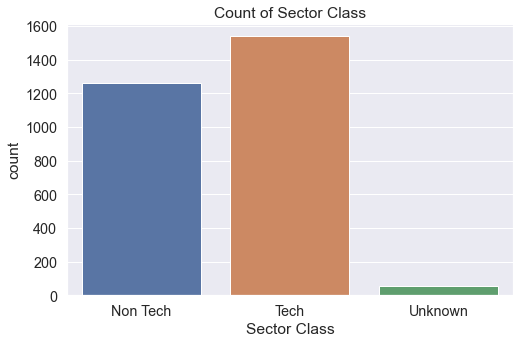

In [122]:
# plot a bar represeting the count of the sector class
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_set, x='Tech or Non-Tech')
plt.title('Count of Sector Class')
plt.xlabel('Sector Class')
plt.show();

>- Through the period from 2018 to 2021 more than 1150 Tech companies was funded.
>- There are about 994 non tech companies that were funded
>- The rest companies had unknown sector class.

## 1. What was the trend Funding over the years. How many companies were funded each year?

In [123]:
# count the number of startup in each Funding Year
combined_set['Funding Year'].value_counts()

2021    1190
2020    1052
2018     525
2019      89
Name: Funding Year, dtype: int64

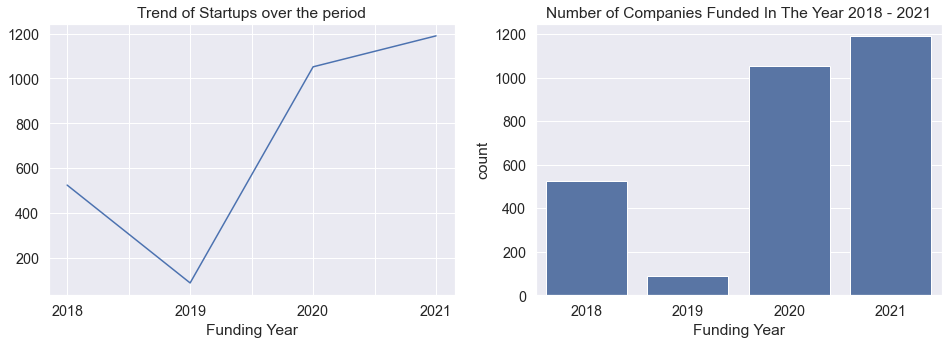

In [124]:
# plot a line gragh to show the trend of startup with the period 2018 - 2021
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = combined_set.groupby(['Funding Year'])['Company Name'].count()
funding_year_count.plot();
plt.title('Trend of Startups over the period')


# plot a bar chart to show the number of startups within each year
plt.subplot(1, 2, 2)
sns.countplot(
    x='Funding Year',  
    data=combined_set, 
    color=base_color)

plt.title('Number of Companies Funded In The Year 2018 - 2021')
plt.show()

>- The rend of the indian startup ecosysten has been increasing yearly except that there was a frop in the year 2019, from more than 500 startups in 2018 to less than 100 startups in 2019

## 3. Top Ten Cities with Most Startups

In [125]:
# count the number of startups in each city
top_ten_HQ = combined_set['Headquarters'].value_counts().head(10).sort_values()
top_ten_HQ

Hyderabad     76
Gurgaon       80
Noida         86
Delhi         88
Pune         104
Chennai      106
New Delhi    230
Gurugram     238
Mumbai       468
Bangalore    859
Name: Headquarters, dtype: int64

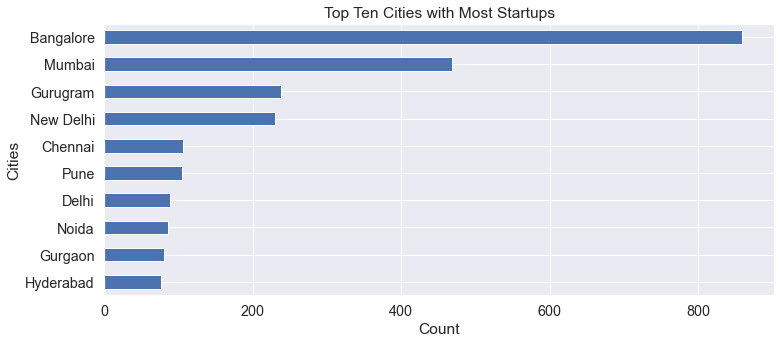

In [126]:
# plot a horinzontal bar chart to show the number of startups in each city
plt.figure(figsize=(12, 5))
top_ten_HQ.plot(kind='barh')
plt.title('Top Ten Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities');

>- Cities that headquartered most startups over the period 210 to 2021 were in the order Bangalore, Mumbai, Gurugram, New Delhi,, Chennai, Pune, Delhi, Noida, Gurgaon, Hyderabad with 859, 468, 238, 230, 106, 104, 88, 86, 80, 76 startups respevtively
>-  Bangalore has alomost twice the number of starups in India's largest city Mumbai.

## 4. Did Companies receive multiple funding through out the time period. 

In [127]:
# Check for dupliactes to confirm multiple fundings
duplicate_companies =combined_set.duplicated('Company Name').sum()
duplicate_companies
print(f"There  were {duplicate_companies} duplicates in the combined dataset")

There  were 642 duplicates in the combined dataset


In [128]:
pd.set_option('display.min_rows', None)
number_of_fundings = combined_set.groupby(['Company Name']).agg({'Amount': 'sum', 'Company Name':'count'})
number_of_fundings.rename(columns={'Company Name': 'Number of Fundings'}, inplace=True)
number_of_fundings['Number of Fundings'] = number_of_fundings['Number of Fundings'].astype(str)
number_of_fundings.reset_index(drop=False).sort_values(by='Number of Fundings', ascending=False).head()


Company Name       Amount Number of Fundings
2153       Zomato 1239000000.0                  7
1309        Nykaa   63135000.0                  6
1741       Spinny  525700000.0                  6
1908        Trell  163250000.0                  6
2141      Zetwerk  925200000.0                  6

In [129]:
# get the fraction of the number of company that received funding once, twice and three times or more
total = len(number_of_fundings)
number_of_fundings['Number of Fundings'] = number_of_fundings['Number of Fundings'].astype(int)
one_funding = len(number_of_fundings[number_of_fundings['Number of Fundings'] == 1]) / total
two_funding = len(number_of_fundings[number_of_fundings['Number of Fundings'] == 2]) / total
multiple_funding = len(number_of_fundings[number_of_fundings['Number of Fundings'] >= 3]) / total
print(one_funding ,two_funding, multiple_funding)

0.8080397470641373 0.13233965672990064 0.05962059620596206


Text(0, 0.5, 'Average ratings')

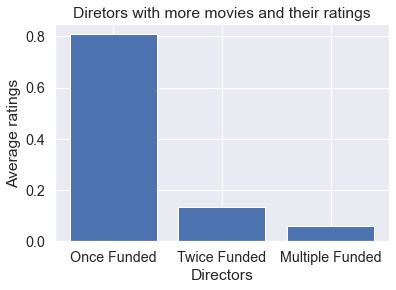

In [130]:
# plot a bar chart to show the fractions or percentages for fundings
locations = [1, 2, 3]
heights = [one_funding, two_funding, multiple_funding]
labels = ['Once Funded', 'Twice Funded', 'Multiple Funded']
plt.bar(locations, heights, tick_label=labels)
plt.title('Diretors with more movies and their ratings')
plt.xlabel('Directors')
plt.ylabel('Average ratings')

>- Over the period of four only 6% out of the total number of funded startups that were funded more than twice. Around 13 percent of the total number of startup were funded twice, the rest were all funded once.

### 5. Which sector had most startups?

In [131]:
# check the top 10 cities with the most startups
Top_ten_sectors = combined_set['New Sector'].value_counts().head(10)
Top_ten_sectors

Fintech                    276
Edtech                     261
Healthcare and wellness    169
Financial services         168
E-commerce                 128
Food and nutrition         103
It                          81
Automotive                  80
Artificial inteligence      76
Technology                  67
Name: New Sector, dtype: int64

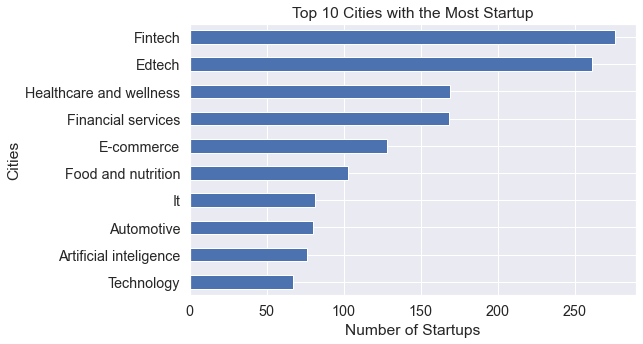

In [132]:
# plot a bar chart to show the top 10 sectors with the most number of startups
plt.figure(figsize=(8, 5))
Top_ten_sectors.sort_values().plot(kind='barh')
plt.title('Top 10 Cities with the Most Startup')
plt.xlabel('Number of Startups')
plt.ylabel('Cities');

>- The top 10 sectors with the most startups were in the order from first to tenth: Fintech, Edtech, Healthcare and wellness , Financial services, E-commerce, Food and nutrition, It, Automotive, Artificial inteligence, Technology with 276, 261, 169, 168, 128, 103, 81, 80, 76 and 67 startups respectively. Enterpreneurs can to venture into these top 10 sectors to increse their chances of getting funded. Out of the sectors with most startups 7 of them were tech companies.

In [133]:
combined_set.groupby('New Sector').agg({'Amount': 'mean', 'New Sector': 'count'}).rename(columns=({'New Sector': 'count'})).sort_values(by='count', ascending=False)

Amount  count
New Sector                                              
Fintech                               652274239.1    276
Edtech                                 28895392.7    261
Healthcare and wellness                12991719.1    169
Financial services                     30781158.4    168
E-commerce                             30205375.4    128
Food and nutrition                      9412996.5    103
It                                     11668716.4     81
Automotive                             42955619.4     80
Artificial inteligence                 12904674.9     76
Technology                             76602292.2     67
Agriculture technology                 11287796.6     66
Healthtech                             18749741.3     65
Saas                                   19101130.6     64
Logistics and supply chain             23491058.8     56
Unknown                                 6189096.5     53
Consumer goods and services             7077855.3     53
Gaming                                 18455073.2     47
Software                               16508055.6     45
Fashion                                19599663.2     45
Iot                                     9589720.6     34
B2b                                    14582160.0     29
Media                                  25658173.9     27
Retail                               2821735200.0     26
Foodtech                               31524226.3     24
Apps                                    6307380.4     23
Hospitality                            86778050.0     22
Entertainment                          26682800.0     22
Education                              44771773.0     21
Housing and real estate                 8172136.9     20
Transportation                         27549217.6     20
Beauty and cosmetics                   10064055.6     20
Biotechnology                          18868200.0     20
Aerospace                              28187333.3     16
Analytics                               2573870.8     15
Energy                                 53588642.9     15
Sports                                 81905181.8     15
Delivery services                     196772700.0     14
Automation tech                        10957100.0     14
Deeptech                                2636000.0     12
Social media                          110250000.0     10
Digital media                           1296817.5     10
Consulting                              4827777.8     10
Insurance                             121880555.6     10
Agriculture                             3796888.9      9
Human resources                         9643250.0      9
Hr tech                                 6998062.5      9
Ev                                     17300000.0      9
Social commerce                       105007142.9      8
Home product and servies               61425000.0      8
Blockchain                              2281250.0      8
Cloud company                          23174000.0      8
Co-working and collaboration            2856666.7      7
Renewable energy                       12250000.0      7
Mobility                               91977142.9      7
Rental                                  1769714.3      7
Cleantech                               6798666.7      6
Marketplace                             9569500.0      6
Video streaming and sharig              5600000.0      6
Ar/vr                                   2275000.0      6
Farming                                 6750000.0      6
Cryptocurrency                         56150400.0      6
Content creation and management         2251725.0      6
Travel                                 11366666.7      6
Construction                           38869166.7      6
E-marketing                           112050000.0      5
Online media                            2283333.3      5
Manufacturing                          15653384.0      5
Eye wear                               45812000.0      5
Marketing                               5598400.0    

### 6. Which Top 10 Investors funded more (different companies)startups

In [134]:
Top_10_investors_ = combined_no_duplicates['Investors'].value_counts().head(10)
Top_10_investors_

Inflection Point Ventures    28
Venture Catalysts            25
Mumbai Angels Network        16
Angel investors              14
Titan Capital                11
Undisclosed                  10
Unicorn India Ventures       10
Better Capital                7
Sequoia Capital India         7
Elevation Capital             6
Name: Investors, dtype: int64

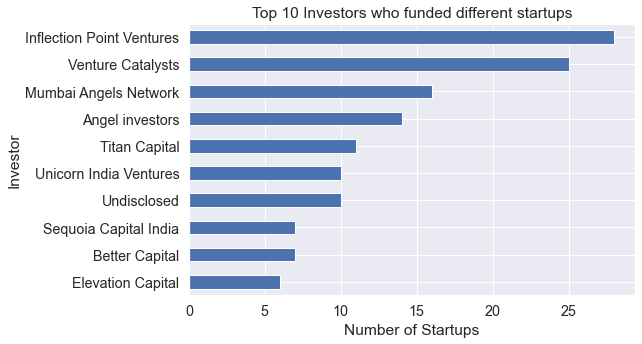

In [135]:
plt.figure(figsize=(8, 5))
Top_10_investors_.sort_values().plot(kind='barh')
plt.title('Top 10 Investors who funded different startups')
plt.xlabel('Number of Startups')
plt.ylabel('Investor');

>- 

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

### 2. What was the highest average funding yearly? 

In [136]:
# get the average(mean) funding yearly
average_funding_year= combined_set.groupby(['Funding Year']).agg({'Amount': 'mean'})
average_funding_year.reset_index(inplace=True)
average_funding_year

Funding Year      Amount
0         2018  12932425.1
1         2019  43330301.3
2         2020 112950185.8
3         2021 171218804.6

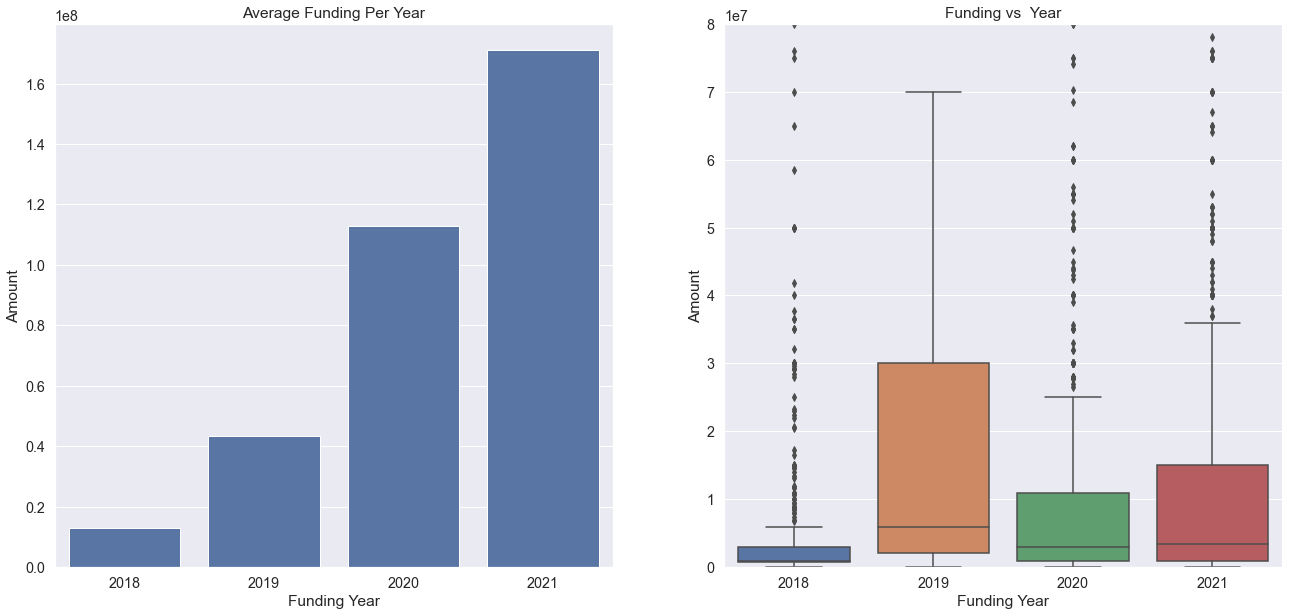

In [137]:
# plot a bar chart to show the avearge funding yearly
plt.figure(figsize=(22, 10))
plt.subplot(1, 2, 1)
sns.barplot(
    data=average_funding_year,
    x='Funding Year',
    y='Amount',
    color=base_color)
plt.title('Average Funding Per Year')

# plot a box plot to show the avearge funding yearly
plt.subplot(1, 2, 2)
sns.boxplot(data=combined_set, y='Amount', x='Funding Year')
plt.title('Funding vs  Year');
plt.ylim(-10,80000000);

>- Looking at the the fist viz the average funding by mean has been increasing yearly. From around 13M dollars in 2018 to 44M dollars in 2019 to 113M dollars in 2020 to 171 M dollars in 2021.
>- Lokking at the second viz the year 20199 has the highest average by median compared to the years.This was due to the fact that 2019 had a very small number of startups recored. Most of the amount in 2018, 2020 and 2021 were treated as outliers. Carefullly looking at teh trend we can anticipate the median funding in the subsequent years will increase. 

In [138]:
### What is the sum of investments per year

In [139]:
# get the sum of fundings per year
sum_funding_year= combined_set.groupby(['Funding Year']).agg({'Amount': 'sum'})
sum_funding_year.reset_index(inplace=True)
sum_funding_year

Funding Year         Amount
0         2018   6789523177.0
1         2019   3336433200.0
2         2020  90924899604.0
3         2021 179608526000.0

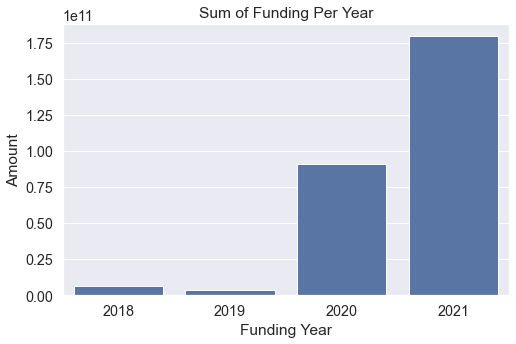

In [140]:
# plot a bar chart to show te sum of funings in ech year
plt.figure(figsize=(8, 5))
sns.barplot(
    data=sum_funding_year,
    x='Funding Year',
    y='Amount',
    color=base_color)

plt.title('Sum of Funding Per Year')
plt.show()

In [141]:
# What is the sum of fundings in by sector class(Tech, Non Tech, Unkown) 

In [142]:
# group the dataframe by sector class and get the sum
sum_sector_class = combined_set.groupby(['Tech or Non-Tech'])['Amount'].sum()
sum_sector_class

Tech or Non-Tech
Non Tech    98776168099.0
Tech       181567569962.0
Unknown       315643920.0
Name: Amount, dtype: float64

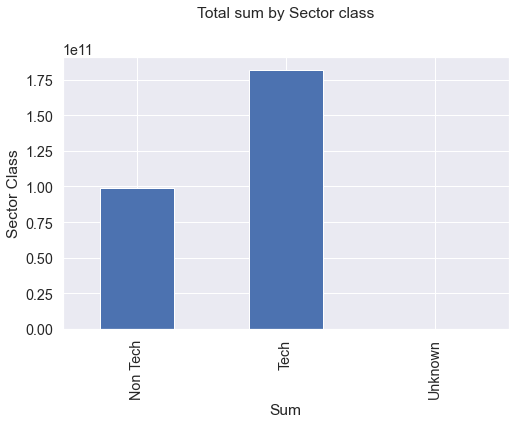

In [143]:
# plot a bar chart to show the sum of the fundings in each sector class
plt.figure(figsize=(8, 5))
sum_sector_class.plot(kind='bar')
plt.title('Total sum by Sector class', pad=40)
plt.ylabel('Sector Class')
plt.xlabel('Sum')
plt.show()

>- The total amount of funds received by Tech companies was more than Non Tech companies
>- It was around 181B dollars for Tech against the 99B dollars for Non Tech

In [144]:
### Ammong the highly funded compnaies which of them were were Tech companies

In [145]:
# get the median amountin the dataframe 
median = combined_set['Amount'].median()
# create filter of the companies that received funding greater than the median value
highly_funded = combined_no_duplicates.query('Amount > {}'.format(median))
# count the nnumber of companies in the sector class
highly_funded_companies = highly_funded['Tech or Non-Tech'].value_counts()
highly_funded_companies

Tech        440
Non Tech    347
Unknown      12
Name: Tech or Non-Tech, dtype: int64

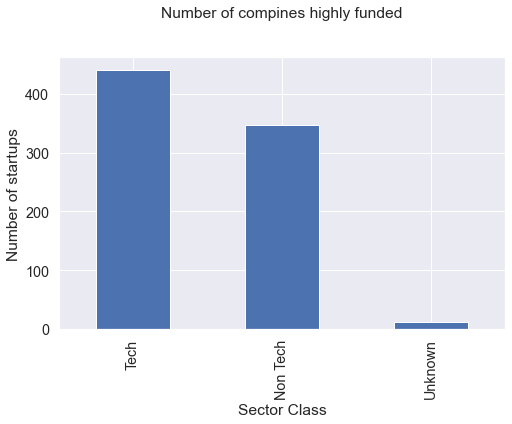

In [146]:
# plot a bar chart to show the number of highly funded companies in each sector class
plt.figure(figsize=(8, 5))
highly_funded_companies.plot(kind='bar')
plt.title('Number of compines highly funded', pad=40)
plt.ylabel('Number of startups')
plt.xlabel('Sector Class')
plt.show()

>- From the chart, the Tech sector class had the highest number highly funded startups. It had 440 startups compared to Non Tech's 347 

### Which top 10 Funding Stages received most fundings? How much of it was used to fund a Tech companies?

In [147]:
# # get the top 10 funding stages by  amount
top_10_funded_stages = combined_set.groupby(['Funding Stage']).agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(10)
top_10_funded_stages = top_10_funded_stages.reset_index(drop=False)
# get the list Funding stages
list_stages = top_10_funded_stages['Funding Stage'].unique().tolist()
# filter out dataframe that contains the list of funding stages
stages = combined_set[combined_set['Funding Stage'].isin(list_stages)]
stages.head()

Company Name Funding Stage Headquarters    Amount Funding Year  \
2            MyLoanCare      Series A      Gurgaon  949000.0         2018   
20             Cogoport      Series A       Mumbai 6000000.0         2018   
25  AgNext Technologies      Series A       Mohali 1000000.0         2018   
35            Loadshare      Series A    Bengaluru 5000000.0         2018   
36              Yumlane      Series A       Mumbai 4000000.0         2018   

   Funding Status Year Founded Founders Investors              New Sector  \
2       Disclosed         <NA>      NaN       NaN      Financial services   
20      Disclosed         <NA>      NaN       NaN  Artificial inteligence   
25      Disclosed         <NA>      NaN       NaN             Agriculture   
35      Disclosed         <NA>      NaN       NaN         Automation tech   
36      Disclosed         <NA>      NaN       NaN      Food and nutrition   

   Tech or Non-Tech  Company Age  Age at Funding  
2          Non Tech         <NA>            <NA>  
20             Tech         <NA>            <NA>  
25         Non Tech         <NA>            <NA>  
35             Tech         <NA>            <NA>  
36         Non Tech         <NA>            <NA>

In [148]:
# group the stages df by 'Funding Stage', 'Tech or Non-Tech' and the total fundings
stages = stages.groupby(['Funding Stage', 'Tech or Non-Tech']).agg({'Amount': 'sum'})
stages_ = stages.reset_index(drop=False) # reset the index
# create three dataframes from the top 10 stages using the values in the 'Tech or Non Tech' column
stages_tech = stages_[stages_['Tech or Non-Tech'] == 'Tech']
stages_nontech = stages_[stages_['Tech or Non-Tech'] == 'Non Tech']
stages_unknown = stages_[stages_['Tech or Non-Tech'] == 'Unknown']

In [149]:
# merge the three dataframes created on the 'Funding Stages' column using 'outer'
stacked_stages_df = pd.merge(stages_tech, stages_nontech, how='outer', on='Funding Stage')
stacked_stages_df_ = pd.merge(stacked_stages_df, stages_unknown, how='outer', on='Funding Stage')
stacked_stages_df_.rename(columns={'Amount_x': 'Tech', 'Amount_y': 'Non Tech', 'Amount': 'Unknown'}, inplace=True)
stacked_stages_df_.drop(columns=['Tech or Non-Tech_x', 'Tech or Non-Tech_y', 'Tech or Non-Tech'], inplace=True)
stacked_stages_df_.set_index('Funding Stage', inplace=True)

In [150]:
# display the result of the merged dfs
stacked_stages_df_

Tech      Non Tech     Unknown
Funding Stage                                          
Debt Financing 150651660000.0    57063200.0  16060000.0
Private equity    846600000.0  1309400000.0         NaN
Series A         1631232276.0  1240415920.0  14589600.0
Series B         2220458200.0  1581873400.0  40000000.0
Series C         2995810000.0  2357106700.0  75000000.0
Series D         2638099160.0  1754870000.0   7000000.0
Series E         1722953000.0  1734524000.0         NaN
Series F         1144800000.0   570400000.0         NaN
Unknown         15535394450.0 84044016874.0 130409000.0
Series H                  NaN  2312500000.0         NaN

<Figure size 1080x360 with 0 Axes>

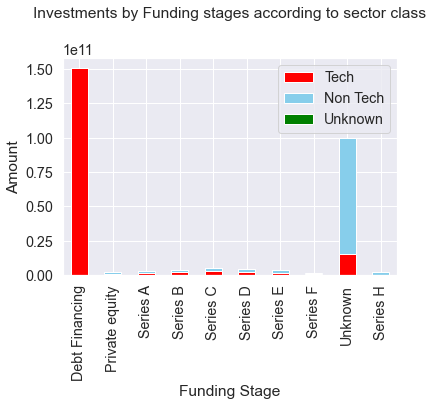

In [151]:
# Used a stacked barplot to visualize the data
plt.figure(figsize=(15, 5))
stacked_stages_df_.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.title('Investments by Funding stages according to sector class', pad=40)
plt.xlabel('Funding Stage')
plt.ylabel('Amount')
plt.show()

### What are the top 10  Cities which were the  funded most

In [152]:
 # get the top 10 Headquaters by  amount
top_10_funded_cities = combined_set.groupby(['Headquarters']).agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(10)
top_10_funded_cities = top_10_funded_cities.reset_index(drop=False)
# get the list Headquaters
list_cities = top_10_funded_cities['Headquarters'].unique().tolist()
# filter out dataframe that contains the list of Headquaters
cities = combined_set[combined_set['Headquarters'].isin(list_cities)]
cities.head()

Company Name Funding Stage Headquarters    Amount Funding Year  \
0     TheCollegeFever          Seed    Bangalore  250000.0         2018   
1     Happy Cow Dairy          Seed       Mumbai  584000.0         2018   
2          MyLoanCare      Series A      Gurgaon  949000.0         2018   
8        Freightwalla          Seed       Mumbai 1000000.0         2018   
9  Microchip Payments          Seed    Bangalore 1000000.0         2018   

  Funding Status Year Founded Founders Investors          New Sector  \
0      Disclosed         <NA>      NaN       NaN     Brand marketing   
1      Disclosed         <NA>      NaN       NaN         Agriculture   
2      Disclosed         <NA>      NaN       NaN  Financial services   
8      Disclosed         <NA>      NaN       NaN                  It   
9      Disclosed         <NA>      NaN       NaN             Fintech   

  Tech or Non-Tech  Company Age  Age at Funding  
0         Non Tech         <NA>            <NA>  
1         Non Tech         <NA>            <NA>  
2         Non Tech         <NA>            <NA>  
8             Tech         <NA>            <NA>  
9             Tech         <NA>            <NA>

In [153]:
# group the cities df by 'Headquarters', 'Tech or Non-Tech' and the total fundings
cities = cities.groupby(['Headquarters', 'Tech or Non-Tech']).agg({'Amount': 'sum'})
cities_ = cities.reset_index(drop=False)  # reset the index
# create three dataframes from the top 10 cities using the values in the 'Tech or Non Tech' column
cities_tech = cities_[cities_['Tech or Non-Tech'] == 'Tech']
cities_nontech = cities_[cities_['Tech or Non-Tech'] == 'Non Tech']
cities_unknown = cities_[cities_['Tech or Non-Tech'] == 'Unknown']

In [155]:
# merge the three dataframes created on the 'Headquarters' column using 'outer' as how
stacked_cities_df = pd.merge(cities_tech, cities_nontech, how='outer', on='Headquarters')
stacked_cities_df_ = pd.merge(stacked_cities_df, cities_unknown, how='outer', on='Headquarters')
stacked_cities_df_.rename(columns={'Amount_x': 'Tech', 'Amount_y': 'Non Tech', 'Amount': 'Unknown'}, inplace=True)
stacked_cities_df_.drop(columns=['Tech or Non-Tech_x', 'Tech or Non-Tech_y', 'Tech or Non-Tech'], inplace=True)

In [156]:
stacked_cities_df_.set_index('Headquarters', inplace=True)


In [157]:
#  display the results of the merged dfs
stacked_cities_df_

Tech      Non Tech    Unknown
Headquarters                                        
Bangalore     12158531376.0 11664061228.0 50281800.0
California     3078300000.0           NaN        NaN
Chennai         766852300.0   362123526.0  1000000.0
Delhi           644310900.0   194113700.0  2500000.0
Gurgaon         272995920.0  1112430260.0 14330000.0
Gurugram       2348680500.0  3216332000.0 11219000.0
Haryana         391025000.0   531960000.0        NaN
Mumbai       154241229600.0 77285097700.0 15868400.0
New Delhi      1802103500.0  1635167540.0   250000.0
Pune            857574000.0   530361785.0 14002920.0

<Figure size 1440x1440 with 0 Axes>

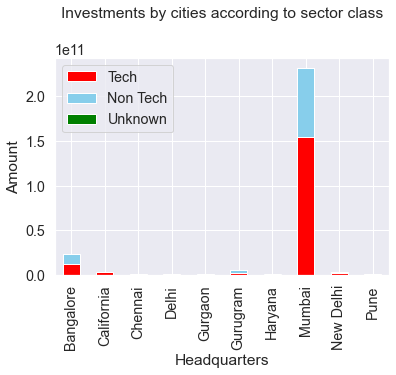

In [158]:
# Used a stacked barplot to visualize the data
plt.figure(figsize=(20, 20))
stacked_cities_df_.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.title('Investments by cities according to sector class', pad=40)
plt.xlabel('Headquarters')
plt.ylabel('Amount')
plt.show()

### 7. Are there any correlations between any of the features?: 

In [159]:
# lets create dataframe where columns with object data types have cateforized using random numerical values
df_categorized = combined_set.copy()
for col in df_categorized.columns:
    if (df_categorized[col].dtype == 'object'):
        df_categorized[col] = df_categorized[col].astype('category')
        df_categorized[col] = df_categorized[col].cat.codes
        
# lets sort them by gross to be able to confirm change with the df_sorted_by_gross dataframe        
df_categorized.sort_values(by='Amount', ascending=False).head()

Company Name  Funding Stage  Headquarters         Amount  Funding Year  \
1739            70              3            79 150000000000.0             3   
892           1556             29            79  70000000000.0             2   
929           1726             29            22   3000000000.0             2   
940           1553             29            79   2200000000.0             2   
101           1818             26            10   1000000000.0             0   

      Funding Status  Year Founded  Founders  Investors  New Sector  \
1739               2            30      1923         -1         110   
892                2            18      1062       1373         230   
929                2            24       485       1286         258   
940                2             1       614        495         187   
101                2            34        -1         -1          64   

      Tech or Non-Tech  Company Age  Age at Funding  
1739                 1            4               3  
892                  0           16              14  
929                  1           10               8  
940                  0           49              47  
101                  0         <NA>            <NA>

In [160]:
# Code here
correlation = df_categorized.corr()
correlation.head()

Company Name  Funding Stage  Headquarters  Amount  \
Company Name            1.0            0.0          -0.0    -0.0   
Funding Stage           0.0            1.0          -0.0    -0.0   
Headquarters           -0.0           -0.0           1.0     0.0   
Amount                 -0.0           -0.0           0.0     1.0   
Funding Year           -0.0            0.2          -0.0     0.0   

               Funding Year  Funding Status  Year Founded  Founders  \
Company Name           -0.0             0.0           0.0      -0.0   
Funding Stage           0.2             0.1          -0.2       0.1   
Headquarters           -0.0             0.0          -0.0      -0.1   
Amount                  0.0            -0.0          -0.0       0.0   
Funding Year            1.0             0.0          -0.4       0.5   

               Investors  New Sector  Tech or Non-Tech  Company Age  \
Company Name        -0.0         0.0              -0.0         -0.0   
Funding Stage        0.1         0.0              -0.0          0.2   
Headquarters        -0.0        -0.0              -0.1          0.1   
Amount              -0.0         0.0               0.0          0.0   
Funding Year         0.5         0.1               0.0         -0.2   

               Age at Funding  
Company Name             -0.0  
Funding Stage             0.2  
Headquarters              0.1  
Amount                    0.0  
Funding Year             -0.0

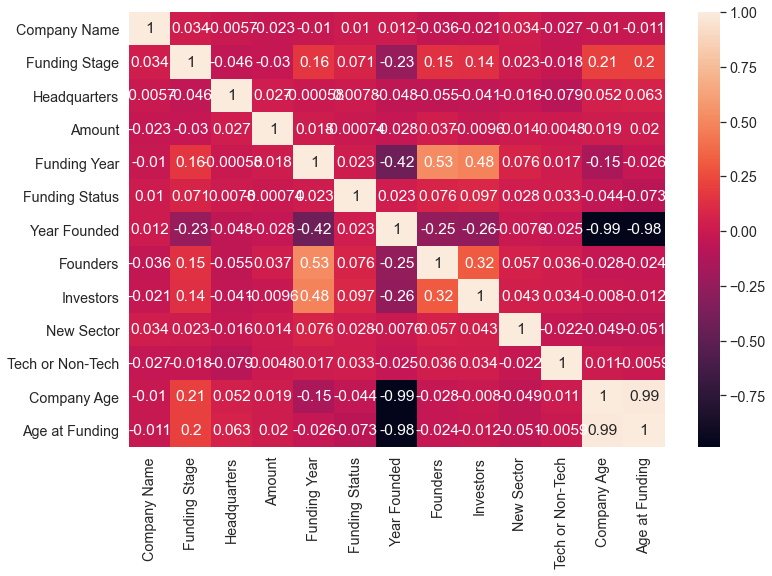

In [161]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True)
plt.show()

### 8. What is the relationship between the Amount and the top 4 Funding Stage

In [162]:
combined_set['Funding Stage'].value_counts().head(5)

Unknown         926
Seed            730
Series A        308
Pre Series A    291
Series B        138
Name: Funding Stage, dtype: int64

In [163]:
top_stages = combined_set[combined_set['Funding Stage'].isin(['Seed', 'Series A', 'Pre Series A', 'Series B'])]
top_stages.head()

Company Name Funding Stage Headquarters    Amount Funding Year  \
0  TheCollegeFever          Seed    Bangalore  250000.0         2018   
1  Happy Cow Dairy          Seed       Mumbai  584000.0         2018   
2       MyLoanCare      Series A      Gurgaon  949000.0         2018   
4         Eunimart          Seed    Hyderabad 1000000.0         2018   
5           Hasura          Seed    Bengaluru 1600000.0         2018   

  Funding Status Year Founded Founders Investors          New Sector  \
0      Disclosed         <NA>      NaN       NaN     Brand marketing   
1      Disclosed         <NA>      NaN       NaN         Agriculture   
2      Disclosed         <NA>      NaN       NaN  Financial services   
4      Disclosed         <NA>      NaN       NaN          E-commerce   
5      Disclosed         <NA>      NaN       NaN       Cloud company   

  Tech or Non-Tech  Company Age  Age at Funding  
0         Non Tech         <NA>            <NA>  
1         Non Tech         <NA>            <NA>  
2         Non Tech         <NA>            <NA>  
4             Tech         <NA>            <NA>  
5             Tech         <NA>            <NA>

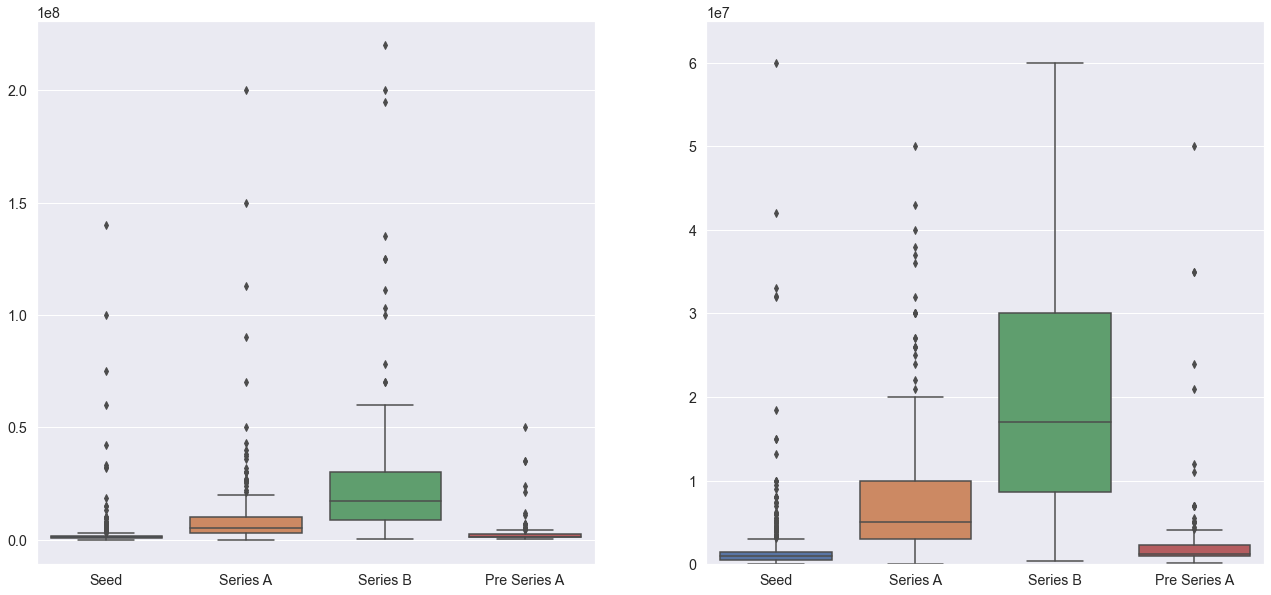

In [164]:
plt.figure(figsize=[22, 10])
plt.subplot(1, 2, 1)
sns.boxplot(data=top_stages, y='Amount', x='Funding Stage')
plt.title('')
plt.xlabel('')
plt.ylabel('');


plt.subplot(1, 2, 2)
sns.boxplot(data=top_stages, y='Amount', x='Funding Stage')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.ylim(-10,65000000);


### 9. What is the correlation between Company Age at the time of funding and Amount

In [165]:
combined_set['Company Age'].unique()

<IntegerArray>
[<NA>,    8,   18,    9,   12,    4,    3,    5,   11,    7,    6,   10,   14,
    2,   24,   15,   40,   13,   27,   16,   44,   23,   28,   17,   49,   20,
   21,    1,   29,   33,   22,   19,   31,   38,   59]
Length: 35, dtype: Int64

In [166]:
amount_fund_year_dropna = combined_set.dropna(how='any', subset=['Amount', 'Age at Funding'])
amount_fund_year_dropna

Company Name   Funding Stage  \
526                            Ruangguru        Series C   
528                             HomeLane        Series D   
529                             Nu Genes         Unknown   
532                             Kratikal    Pre Series A   
534                             Lenskart        Series G   
537                           Kaleidofin        Series A   
538                            JobSquare            Seed   
540                               LivFin         Unknown   
541                               Byju's         Unknown   
542                           Zest Money        Series B   
543                              Witblox         Unknown   
545                           SalaryFits         Unknown   
546                         Pristyn Care        Series B   
547                          Springboard    Pre Series A   
549                              Medlife         Unknown   
550                              Seekify            Seed   
551                     Toffee Insurance        Series A   
553                            HungerBox        Series C   
554                                Bijak            Seed   
555                              Licious        Series E   
558                    Asteria Aerospace         Unknown   
559                               Rivigo        Series F   
560                          HappyEasyGo        Series B   
561                              Zetwerk        Series B   
563                          Freshokartz    Pre Series A   
565                                Trell    Pre Series A   
567                 Bombay Shirt Company         Unknown   
568                              Slintel         Unknown   
573                                 Box8         Unknown   
574                    Awign Enterprises        Series A   
575                              Purplle        Series C   
576                         Freightwalla        Series A   
577                             TapChief    Pre Series A   
578                               eJOHRI    Pre Series A   
583                                Origo         Unknown   
585                         Ecom Express         Unknown   
586                        Stanza Living         Unknown   
591                             Lawyered         Unknown   
592                              Cuemath         Unknown   
593                              Licious        Series D   
594                           Nivesh.com         Unknown   
595                                 Zebu            Seed   
597                             CarDekho        Series D   
598                            Shadowfax        Series D   
599                                Credr         Unknown   
601                               Phable         Unknown   
603                             IndyFint        Series A   
604                            Zolostays         Unknown   
605                                  Ola         Unknown   
606                              Zoomcar         Unknown   
607                             Kratikal    Pre Series A   
610                                  Oyo         Unknown   
611                           GoMechanic        Series B   
612                               Spinny         Unknown   
614                           Aqgromalin         Unknown   
615                             Krayonnz        Pre Seed   
617                                NCOME            Seed   
618                           Gramophone         Unknown   
619                               qZense            Seed   
620                         MyClassboard    Pre Series A   
622                               Rupeek        Series C   
623                            Gig India    Pre Series A   
624                          Slurrp Farm        Series A   
627                             Brila 91         Unknown   
628                           FoodyBuddy         Unknown   
629                               Zomato         Unknown   
630     

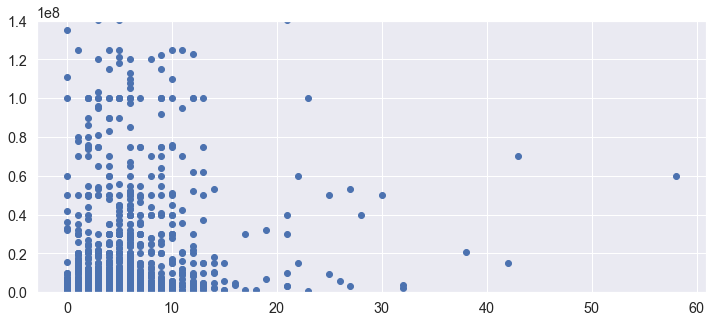

In [167]:
plt.figure(figsize=(12, 5))
plt.scatter(x=amount_fund_year_dropna['Age at Funding'], y=amount_fund_year_dropna['Amount'])
plt.ylim(0, 140000000);

### 10. What is the relationship between the top 3 Cities with more startups, the funding stage and the amount

(0.0, 52000000.0)

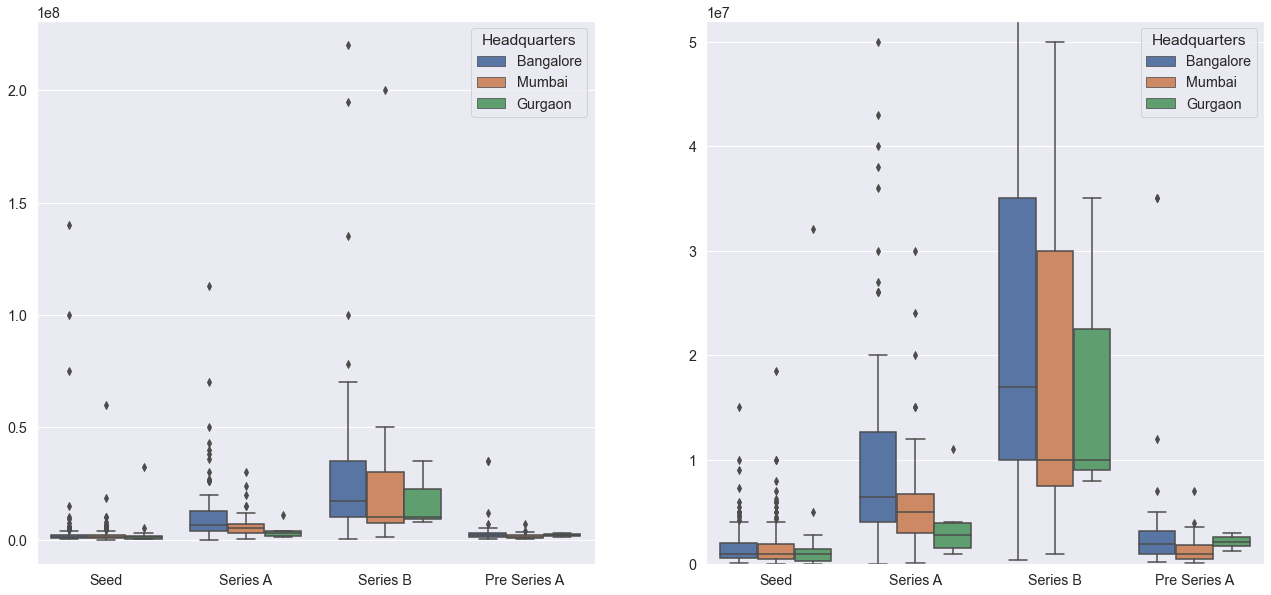

In [168]:
plt.figure(figsize=[22, 10])
plt.subplot(1, 2, 1)
sns.boxplot(data=top_stages[top_stages['Headquarters'].isin(['Bangalore', 'Mumbai', 'Gurgaon'])], y='Amount', x='Funding Stage', hue='Headquarters')
plt.title('')
plt.xlabel('')
plt.ylabel('');


plt.subplot(1, 2, 2)
sns.boxplot(data=top_stages[top_stages['Headquarters'].isin(['Bangalore', 'Mumbai', 'Gurgaon'])], y='Amount', x='Funding Stage', hue='Headquarters')
plt.title('')
plt.xlabel('')
plt.ylabel('');
plt.ylim(0, 52000000)

In [169]:
df_2020[df_2020['Founders'].isin(['Falguni Nayar', 'Byju Raveendran', 'Saurabh Saxena, Pulkit Jain, Anand Prakash, Vamsi Krishna'])]

Company/Brand Founded HeadQuarter      Sector  \
120          Nykaa    2012      Mumbai   Cosmetics   
213          Nykaa    2012      Mumbai  E-commerce   
326         Byju’s    2011   Bangalore      EdTech   
340          Nykaa    2012      Mumbai     Fashion   
494         Byju's    2011   Bangalore      EdTech   
568        Vedantu    2011   Bangalore      Edtech   
618         Byju's    2011   Bangalore      Edtech   
712          Nykaa    2012      Mumbai   Ecommerce   
756        Vedantu     NaN   Bangalore      Edtech   
792        Vedantu     NaN   Bangalore      Edtech   
813          Nykaa    2012      Mumbai   Ecommerce   
920        Vedantu     NaN   Bangalore      Edtech   
935           Byju    2011         NaN      Edtech   
1035          Byju    2011         NaN      Edtech   

                                           What it does  \
120   Nykaa is an online marketplace for different b...   
213   Nykaa is an online marketplace for different b...   
326   An Indian educational technology and online tu...   
340                  Cosmetics & beauty products online   
494                    Provides online learning classes   
568                             Onine learning platform   
618                    Provides online learning classes   
712             Deals in cosmetic and wellness products   
756                             Onine learning platform   
792                             Onine learning platform   
813             Deals in cosmetic and wellness products   
920                             Onine learning platform   
935                    Provides online learning classes   
1035                   Provides online learning classes   

                                               Founders  \
120                                       Falguni Nayar   
213                                       Falguni Nayar   
326                                     Byju Raveendran   
340                                       Falguni Nayar   
494                                     Byju Raveendran   
568   Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...   
618                                     Byju Raveendran   
712                                       Falguni Nayar   
756   Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...   
792   Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...   
813                                       Falguni Nayar   
920   Saurabh Saxena, Pulkit Jain, Anand Prakash, Va...   
935                                     Byju Raveendran   
1035                                    Byju Raveendran   

                                   Investor   Amount($)     Stage  \
120                Alia Bhatt, Katrina Kaif         NaN       NaN   
213         Katrina Kaif, Steadview Capital         NaN       NaN   
326   Owl Ventures, Tiger Global Management 500000000.0       NaN   
340                       Steadview Capital  24700000.0       NaN   
494                              DST Global 122000000.0       NaN   
568                                  Coatue 100000000.0  Series D   
618                                    BOND         NaN       NaN   
712                       Steadview capital   8800000.0       NaN   
756                 KB Global Platform Firm   6800000.0  Series C   
792                          Legend Capital  12500000.0  Series C   
813                       Steadview capital  13137000.0       NaN   
920                             GGV Capital  24000000.0  Series C   
935                        General Atlantic 200000000.0       NaN   
1035                           Tiger Global 200000000.0       NaN   

     Funding Status Year of Funding  
120     Undisclosed            2020  
213     Undisclosed            2020  
326       Disclosed            2020  
340       Disclosed            2020  
494       Disclosed            2020  
568       Disclosed            2020  
618     Undisclosed            2020  
712       Disclosed            2020  
756       Disclosed            2020  
792   

In [170]:
combined_set['Investors'].value_counts()

Inflection Point Ventures                                                                                                                           35
Venture Catalysts                                                                                                                                   32
Mumbai Angels Network                                                                                                                               17
Angel investors                                                                                                                                     15
Undisclosed                                                                                                                                         13
Tiger Global                                                                                                                                        12
Titan Capital                                                                                 

In [171]:
# log_binsize = 1
# # bins_log = 10 ** np.arange(2.4, np.log10(combined_set['Amount'].max()) + log_binsize, log_binsize)
# bins = [np.arange(0, combined_set['Amount'].max()+800, 800)]
# plt.hist(data=combined_set, x='Amount', bins=bins)
# plt.xscale('log')
# plt.show()

In [172]:
combined_set['Amount'].sort_values()

70              876.0
164            1460.0
98             1460.0
258            2920.0
19             7300.0
522            7500.0
95            10000.0
1955          10000.0
1611          12700.0
1612          12700.0
1613          12700.0
166           15000.0
154           17520.0
405           17520.0
966           20000.0
1552          20000.0
402           20000.0
75            20000.0
211           20440.0
1618          25000.0
707           40000.0
488           40000.0
1088          40900.0
1087          40900.0
1086          43000.0
275           50000.0
230           50000.0
965           54000.0
416           70000.0
222           73000.0
367           73000.0
49            73000.0
384          100000.0
1710         100000.0
2541         100000.0
797          100000.0
2506         100000.0
2719         100000.0
2544         100000.0
366          100000.0
1677         100000.0
569          100000.0
865          100000.0
1707         100000.0
591          100000.0
2356      

In [173]:
sector_group.sort_values().plot(kind='barh')

NameError: name 'sector_group' is not defined